# CIV Analysis

This is a notebook to be used after happy with the voigt profiling and like the column densites that were calculated 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#plotting things 
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 35

# update various fontsizes to match
params = {'figure.figsize': (20, 14),
          'legend.fontsize': 18,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.6 * fs,
          'ytick.labelsize': 0.6 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 10,
          'xtick.minor.size': 6,
          'ytick.major.size': 10,
          'ytick.minor.size': 6}
plt.rcParams.update(params)

import astropy.units as u
from linetools.spectralline import AbsLine
from linetools.spectra import io as lsio
from linetools.isgm.abscomponent import AbsComponent
from linetools.spectra.xspectrum1d import XSpectrum1D
from linetools.lists.linelist import LineList
import glob

In [3]:
#Bring in all the COS-Holes fit data
all_vp_df_J1101 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1101/all_vp.csv')
all_vp_df_J1159 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1159/all_vp.csv')
all_vp_df_J1222 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1222/all_vp.csv')
all_vp_df_J1249 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1249/all_vp.csv')
all_vp_df_J1051 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1051/all_vp.csv')
all_vp_df_J1123 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1123/all_vp.csv')
all_vp_df_J0246 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J0246/all_vp.csv')
all_vp_df_J1235 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1235/all_vp.csv')

In [4]:
#We care about the absorption features that we see around the galaxy so need to input the correct info for each one 
#Used some galaxy criterion to only see the lines that fit what I want to plot 

gal_df_J1101 = all_vp_df_J1101.loc[(all_vp_df_J1101['trans']=='C IV')]

#J1101 Values to make new pd df
trans_J1101 = np.array(gal_df_J1101['trans'])
zsys_J1101 = np.array(gal_df_J1101['zsys'])
N_J1101 = np.array(gal_df_J1101['col'])
sigN_J1101 = np.array(gal_df_J1101['sigcol'])
b_J1101 = np.array(gal_df_J1101['bval'])
sigb_J1101 = np.array(gal_df_J1101['sigbval'])
vel_J1101 = np.array(gal_df_J1101['vel'])
sigvel_J1101 = np.array(gal_df_J1101['sigvel'])
wav_J1101 = np.array(gal_df_J1101['restwave'])

#smaller df 
civ_df_J1101= pd.DataFrame({"Line":trans_J1101, "Wavelength":wav_J1101, "zsys":zsys_J1101, "N":N_J1101, "sigN":sigN_J1101, 
                   "b":b_J1101, "sigb":sigb_J1101, "vel":vel_J1101, "sigvel":sigvel_J1101})
civ_df_J1101

,Line,Wavelength,zsys,N,sigN,b,sigb,vel,sigvel
0,C IV,1548.204,0.00004,13.954,0.029,44.1,3.845,-1.221,2.681
1,C IV,1550.781,0.00004,13.954,0.000,44.1,0.000,-1.221,0.000
2,C IV,1548.204,0.00047,13.482,0.068,20.0,5.285,-1.909,3.358
3,C IV,1550.781,0.00047,13.482,0.000,20.0,0.000,-1.909,0.000
4,C IV,1548.204,0.00223,13.403,0.099,35.7,11.549,2.357,7.816
5,C IV,1550.781,0.00223,13.403,0.000,35.7,0.000,2.357,0.000


In [5]:
gal_df_J1159 = all_vp_df_J1159.loc[(all_vp_df_J1159['trans']=='C IV')]

#J1159 Values 
trans_J1159 = np.array(gal_df_J1159['trans'])
zsys_J1159 = np.array(gal_df_J1159['zsys'])
N_J1159 = np.array(gal_df_J1159['col'])
sigN_J1159 = np.array(gal_df_J1159['sigcol'])
b_J1159 = np.array(gal_df_J1159['bval'])
sigb_J1159 = np.array(gal_df_J1159['sigbval'])
vel_J1159 = np.array(gal_df_J1159['vel'])
sigvel_J1159 = np.array(gal_df_J1159['sigvel'])
wav_J1159 = np.array(gal_df_J1159['restwave'])

#smaller df 
civ_df_J1159= pd.DataFrame({"Line":trans_J1159, "Wavelength":wav_J1159, "zsys":zsys_J1159, "N":N_J1159, "sigN":sigN_J1159, 
                   "b":b_J1159, "sigb":sigb_J1159, "vel":vel_J1159, "sigvel":sigvel_J1159})
civ_df_J1159

,Line,Wavelength,zsys,N,sigN,b,sigb,vel,sigvel
0,C IV,1548.204,0.00330,13.697,0.074,80.715,17.306,-9.444,12.162
1,C IV,1550.781,0.00330,13.697,0.000,80.715,0.000,-9.444,0.000
2,C IV,1548.204,-0.00012,14.166,0.022,58.259,3.748,-12.256,2.552
3,C IV,1550.781,-0.00012,14.166,0.000,58.259,0.000,-12.256,0.000


In [6]:
gal_df_J1222 = all_vp_df_J1222.loc[(all_vp_df_J1222['trans']=='C IV')] 

#J1222 Values 
trans_J1222 = np.array(gal_df_J1222['trans'])
zsys_J1222 = np.array(gal_df_J1222['zsys'])
N_J1222 = np.array(gal_df_J1222['col'])
sigN_J1222 = np.array(gal_df_J1222['sigcol'])
b_J1222 = np.array(gal_df_J1222['bval'])
sigb_J1222 = np.array(gal_df_J1222['sigbval'])
vel_J1222 = np.array(gal_df_J1222['vel'])
sigvel_J1222 = np.array(gal_df_J1222['sigvel'])
wav_J1222 = np.array(gal_df_J1222['restwave'])

#smaller df  
civ_df_J1222= pd.DataFrame({"Line":trans_J1222, "Wavelength":wav_J1222, "zsys":zsys_J1222, "N":N_J1222, "sigN":sigN_J1222, 
                   "b":b_J1222, "sigb":sigb_J1222, "vel":vel_J1222, "sigvel":sigvel_J1222})
civ_df_J1222

,Line,Wavelength,zsys,N,sigN,b,sigb,vel,sigvel
0,C IV,1548.204,-0.00012,14.49,0.024,66.143,3.859,10.042,2.992
1,C IV,1550.781,-0.00012,14.49,0.000,66.143,0.000,10.042,0.000


In [7]:
gal_df_J1249 = all_vp_df_J1249.loc[(all_vp_df_J1249['trans']=='C IV')]

#J1249 Values 
trans_J1249 = np.array(gal_df_J1249['trans'])
zsys_J1249 = np.array(gal_df_J1249['zsys'])
N_J1249 = np.array(gal_df_J1249['col'])
sigN_J1249 = np.array(gal_df_J1249['sigcol'])
b_J1249 = np.array(gal_df_J1249['bval'])
sigb_J1249 = np.array(gal_df_J1249['sigbval'])
vel_J1249 = np.array(gal_df_J1249['vel'])
sigvel_J1249 = np.array(gal_df_J1249['sigvel'])
wav_J1249 = np.array(gal_df_J1249['restwave'])

#smaller df 
civ_df_J1249= pd.DataFrame({"Line":trans_J1249, "Wavelength":wav_J1249, "zsys":zsys_J1249, "N":N_J1249, "sigN":sigN_J1249, 
                   "b":b_J1249, "sigb":sigb_J1249, "vel":vel_J1249, "sigvel":sigvel_J1249})
civ_df_J1249

,Line,Wavelength,zsys,N,sigN,b,sigb,vel,sigvel
0,C IV,1548.204,-0.00013,14.190,0.032,41.390,3.687,9.199,2.588
1,C IV,1550.781,-0.00013,14.190,0.000,41.390,0.000,9.199,0.000
2,C IV,1548.204,0.00051,13.855,0.052,34.300,6.220,11.655,3.925
3,C IV,1550.781,0.00051,13.855,0.000,34.300,0.000,11.655,0.000
4,C IV,1548.204,0.00081,13.652,0.103,10.925,4.852,-2.260,2.533
5,C IV,1550.781,0.00081,13.652,0.000,10.925,0.000,-2.260,0.000
6,C IV,1548.204,0.00109,13.946,0.044,30.000,4.293,-11.070,2.849
7,C IV,1550.781,0.00109,13.946,0.000,30.000,0.000,-11.070,0.000


In [8]:
N_J1249

array([14.19 , 14.19 , 13.855, 13.855, 13.652, 13.652, 13.946, 13.946])

In [9]:
gal_df_J1051 = all_vp_df_J1051.loc[(all_vp_df_J1051['trans']=='C IV')] 

#J1051 Values 
trans_J1051 = np.array(gal_df_J1051['trans'])
zsys_J1051 = np.array(gal_df_J1051['zsys'])
N_J1051 = np.array(gal_df_J1051['col'])
sigN_J1051 = np.array(gal_df_J1051['sigcol'])
b_J1051 = np.array(gal_df_J1051['bval'])
sigb_J1051 = np.array(gal_df_J1051['sigbval'])
vel_J1051 = np.array(gal_df_J1051['vel'])
sigvel_J1051 = np.array(gal_df_J1051['sigvel'])
wav_J1051 = np.array(gal_df_J1051['restwave'])

#smaller df 
civ_df_J1051= pd.DataFrame({"Line":trans_J1051, "Wavelength":wav_J1051, "zsys":zsys_J1051, "N":N_J1051, "sigN":sigN_J1051, 
                   "b":b_J1051, "sigb":sigb_J1051, "vel":vel_J1051, "sigvel":sigvel_J1051})
civ_df_J1051

,Line,Wavelength,zsys,N,sigN,b,sigb,vel,sigvel
0,C IV,1548.204,-0.00042,13.985,0.060,34.264,6.485,27.736,4.551
1,C IV,1550.781,-0.00042,13.985,0.000,34.264,0.000,27.736,0.000
2,C IV,1548.204,-0.00003,14.012,0.064,39.000,8.952,6.465,4.749
3,C IV,1550.781,-0.00003,14.012,0.000,39.000,0.000,6.465,0.000
4,C IV,1548.204,0.00026,13.388,0.153,27.700,14.962,16.652,9.372
5,C IV,1550.781,0.00026,13.388,0.000,27.700,0.000,16.652,0.000
6,C IV,1548.204,0.00442,13.990,0.057,32.780,5.621,6.646,3.813
7,C IV,1550.781,0.00442,13.990,0.000,32.780,0.000,6.646,0.000


In [10]:
gal_df_J1123 = all_vp_df_J1123.loc[(all_vp_df_J1123['trans']=='C IV')]

#J1123 Values 
trans_J1123 = np.array(gal_df_J1123['trans'])
zsys_J1123 = np.array(gal_df_J1123['zsys'])
N_J1123 = np.array(gal_df_J1123['col'])
sigN_J1123 = np.array(gal_df_J1123['sigcol'])
b_J1123 = np.array(gal_df_J1123['bval'])
sigb_J1123 = np.array(gal_df_J1123['sigbval'])
vel_J1123 = np.array(gal_df_J1123['vel'])
sigvel_J1123 = np.array(gal_df_J1123['sigvel'])
wav_J1123 = np.array(gal_df_J1123['restwave'])

#smaller df 
civ_df_J1123= pd.DataFrame({"Line":trans_J1123, "Wavelength":wav_J1123, "zsys":zsys_J1123, "N":N_J1123, "sigN":sigN_J1123, 
                   "b":b_J1123, "sigb":sigb_J1123, "vel":vel_J1123, "sigvel":sigvel_J1123})
civ_df_J1123

,Line,Wavelength,zsys,N,sigN,b,sigb,vel,sigvel
0,C IV,1548.204,0.00015,14.171,0.051,56.626,8.100,-23.197,5.747
1,C IV,1550.781,0.00015,14.171,0.000,56.626,0.000,-23.197,0.000
2,C IV,1548.204,0.00275,14.012,0.076,85.000,17.787,-21.098,12.763
3,C IV,1550.781,0.00275,14.012,0.000,85.000,0.000,-21.098,0.000


In [11]:
gal_df_J0246 = all_vp_df_J0246.loc[(all_vp_df_J0246['trans']=='C IV')] 

#J0246 Values 
trans_J0246= np.array(gal_df_J0246['trans'])
zsys_J0246 = np.array(gal_df_J0246['zsys'])
N_J0246 = np.array(gal_df_J0246['col'])
sigN_J0246 = np.array(gal_df_J0246['sigcol'])
b_J0246 = np.array(gal_df_J0246['bval'])
sigb_J0246 = np.array(gal_df_J0246['sigbval'])
vel_J0246 = np.array(gal_df_J0246['vel'])
sigvel_J0246 = np.array(gal_df_J0246['sigvel'])
wav_J0246 = np.array(gal_df_J0246['restwave'])

#smaller df 
civ_df_J0246= pd.DataFrame({"Line":trans_J0246, "Wavelength":wav_J0246, "zsys":zsys_J0246, "N":N_J0246, "sigN":sigN_J0246, 
                   "b":b_J0246, "sigb":sigb_J0246, "vel":vel_J0246, "sigvel":sigvel_J0246})
civ_df_J0246

,Line,Wavelength,zsys,N,sigN,b,sigb,vel,sigvel
0,C IV,1548.204,0.00009,14.078,0.049,33.147,4.818,-12.12,3.293
1,C IV,1550.781,0.00009,14.078,0.000,33.147,0.000,-12.12,0.000
2,C IV,1548.204,0.00422,14.211,0.053,54.100,7.973,18.21,5.687
3,C IV,1550.781,0.00422,14.211,0.000,54.100,0.000,18.21,0.000


In [12]:
gal_df_J1235 = all_vp_df_J1235.loc[(all_vp_df_J1235['trans']=='C IV')]

#J1235 Values 
trans_J1235= np.array(gal_df_J1235['trans'])
zsys_J1235 = np.array(gal_df_J1235['zsys'])
N_J1235 = np.array(gal_df_J1235['col'])
sigN_J1235 = np.array(gal_df_J1235['sigcol'])
b_J1235 = np.array(gal_df_J1235['bval'])
sigb_J1235 = np.array(gal_df_J1235['sigbval'])
vel_J1235 = np.array(gal_df_J1235['vel'])
sigvel_J1235 = np.array(gal_df_J1235['sigvel'])
wav_J1235 = np.array(gal_df_J1235['restwave'])

#smaller df - REMEMBER THIS IS A NON DETECTION
civ_df_J1235= pd.DataFrame({"Line":trans_J1235, "Wavelength":wav_J1235, "zsys":zsys_J1235, "N":N_J1235, "sigN":sigN_J1235, 
                   "b":b_J1235, "sigb":sigb_J1235, "vel":vel_J1235, "sigvel":sigvel_J1235})
civ_df_J1235

,Line,Wavelength,zsys,N,sigN,b,sigb,vel,sigvel
0,C IV,1548.204,-0.00001,14.218,0.029,48.143,3.92,18.541,2.873
1,C IV,1550.781,-0.00001,14.218,0.000,48.143,0.00,18.541,0.000


In [13]:
#Known Galaxy Information

gal_param_df = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/gal_param.csv')
gal_param_df

,galaxy,stellar mass,BH mass,halo mass,Rvir,Rproj,angle
0,NGC3489,10.20,6.770,11.782755,273.43553,110.019140,331.268580
1,NGC4026,10.43,8.255,11.964435,314.35077,37.385240,22.685004
2,NGC4258,10.88,7.577,12.522479,482.42196,69.778997,208.535150
3,NGC4258,10.88,7.577,12.522479,482.42196,130.305660,206.816170
4,NGC4736,10.62,6.830,12.154667,363.76792,25.520224,41.789694
5,NGC3414,10.79,8.400,12.377581,431.64653,40.499140,0.885271
6,NGC3627,10.84,6.920,12.455645,458.29968,119.976000,267.760040
7,NGC1097,10.50,8.140,12.029020,330.32571,55.657239,322.869730
8,NGC4564,10.40,7.940,11.938382,308.12739,123.078500,224.489670


In [14]:
#getting them out of the table 
gal = np.array(gal_param_df['galaxy'])
s_mass = np.array(gal_param_df['stellar mass'])
bh_mass = np.array(gal_param_df['BH mass'])
rvir = np.array(gal_param_df['Rvir'])
rproj = np.array(gal_param_df['Rproj'])

In [15]:
#Nicole Data (CHaNGA Models)

R25_HMbh_civ = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/R25_highMbh_logN_CIV.txt', 
                           sep=" ", header=None, names =['R25_HMbh_civ'])
R25_LMbh_civ = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/R25_lowMbh_logN_CIV.txt', 
                           sep=" ", header=None, names =['R25_LMbh_civ'])
R25_RpRv = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/R25_RoverRvir.txt', 
                       sep=" ", header=None, names =['R25_RpRv'])

R25_df = pd.concat([R25_HMbh_civ, R25_LMbh_civ, R25_RpRv], axis=1, join='inner')
R25_df

,R25_HMbh_civ,R25_LMbh_civ,R25_RpRv
0,11.828552,12.683522,0.000000
1,12.003941,12.746611,0.008081
2,12.049706,13.078299,0.016162
3,12.066849,13.180826,0.024242
4,12.102844,13.089614,0.032323
...,...,...,...
95,10.736462,9.575072,0.767677
96,10.657459,9.445246,0.775758
97,10.619149,9.426555,0.783838
98,10.589303,9.354894,0.791919


In [16]:
#getting them out of the table
r25_highBH_civ = np.array(R25_df['R25_HMbh_civ'])
r25_lowBH_civ = np.array(R25_df['R25_LMbh_civ'])
r25_rprv = np.array(R25_df['R25_RpRv'])

In [17]:
#THIS IS THE NEW DATA THAT NICOLE SENT ME THAT IS JUST STARFORMING GALAXIES SO THAT WE CAN SEE THE DIFFERENCES 

#bringing in Nicole data 
COSChaNGA_HMbh_civ = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/COSholes_ChaNGa_highMbh_logN_CIV.txt', sep=" ", header=None, names =['CC_HMbh_civ'])
COSChaNGA_LMbh_civ = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/COSholes_ChaNGa_lowMbh_logN_CIV.txt', sep=" ", header=None, names =['CC_LMbh_civ'])
COSChaNGA_RpRv = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/COSholes_ChaNGa_RoverRvir.txt', sep=" ", header=None, names =['CC_RpRv'])

#taking them out to plot
CC_highBH_civ = np.array(COSChaNGA_HMbh_civ['CC_HMbh_civ'])
CC_lowBH_civ = np.array(COSChaNGA_LMbh_civ['CC_LMbh_civ'])
CC_rprv = np.array(COSChaNGA_RpRv['CC_RpRv'])

In [18]:
#Ben Data (EAGLE Models)  

BenHbh_df = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/high-M_SMBH_ben.csv')

b_benHbh = np.array(BenHbh_df['#b'])
med_benHbh = np.array(BenHbh_df['median'])
ben_25Hbh = np.array(BenHbh_df['25percentile'])
ben_75Hbh = np.array(BenHbh_df['75percentile'])

BenLbh_df = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/low-M_SMBH_ben.csv')

b_benLbh = np.array(BenLbh_df['#b'])
med_benLbh = np.array(BenLbh_df['median'])
ben_25Lbh = np.array(BenLbh_df['25percentile'])
ben_75Lbh = np.array(BenLbh_df['75percentile'])

In [46]:
BenLbh_df

,#b,median,25percentile,75percentile
0,7.5,14.33,14.17,14.47
1,22.5,14.21,14.05,14.34
2,37.5,14.06,13.88,14.22
3,52.5,13.96,13.71,14.16
4,67.5,13.87,13.62,14.06
5,82.5,13.77,13.51,13.98
6,97.5,13.69,13.39,13.92
7,112.5,13.61,13.29,13.86
8,127.5,13.58,13.25,13.86
9,142.5,13.53,13.17,13.81


In [19]:
#M31 Data (Project AMIGA) Detections (and taking out the MS contaminations) 

amiga_2_det_sum = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/amiga_2_det_sum.csv')
amiga_2_det_sum = amiga_2_det_sum.loc[(amiga_2_det_sum['sumlogN']!= 0)]
amiga_2_det_sum = amiga_2_det_sum.loc[amiga_2_det_sum['MS']==0]

amiga_2_det_sum

,index,QSO,z,RAdeg,Decdeg,Rad,ion,b_Vel,B_Vel,Vel,e_V,logN,sumlogN,E_logN,e_logN,sum_elogN,f_logN,MS
3,49,HS0033+4300,0.120,9.096,43.278,30.5,C IV,-300,-150,-215.8,3.0,14.10,14.100000,0.04,0.05,0.050000,0,0
4,61,HS0058+4213,0.190,15.380,42.493,48.6,C IV,-275,-215,-232.7,6.3,13.33,13.904521,0.12,0.17,0.183848,0,0
6,97,RX_J0043.6+3725,0.080,10.927,37.422,50.5,C IV,-250,-120,-188.5,2.5,13.85,13.850000,0.03,0.03,0.030000,0,0
7,121,Zw535.012,0.048,9.087,45.665,59.7,C IV,-250,-200,-215.3,7.2,12.99,13.414814,0.16,0.26,0.300167,0,0
9,145,RX_J0050.8+3536,0.058,12.711,35.612,77.1,C IV,-300,-190,-237.1,4.7,13.45,13.450000,0.06,0.07,0.070000,0,0
10,183,IRAS_F00040+4325,0.163,1.652,43.708,93.0,C IV,-281,-195,-238.0,3.8,13.23,13.475162,0.06,0.07,0.106301,0,0
12,230,MRK352,0.015,14.972,31.827,131.7,C IV,-350,-267,-282.2,4.1,13.50,14.156552,0.06,0.07,0.152971,0,0
15,296,KAZ238,0.043,0.242,33.344,150.2,C IV,-370,-305,-333.7,4.2,13.45,13.862443,0.09,0.11,0.136015,0,0
17,362,PG0052+251,0.155,13.717,25.427,209.8,C IV,-347,-230,-285.6,3.8,13.41,13.742065,0.05,0.05,0.064031,0,0
19,386,RXS_J0155.6+3115,0.135,28.900,31.255,231.6,C IV,-270,-140,-210.0,3.5,13.92,13.920000,0.05,0.05,0.050000,0,0


In [20]:
#Calculating the Project AMIGA Rproj/Rvir so that I can add to future plot 
#making sure to use r200 as a substitute for since that is what we used 
amiga_m31_rvrir = 230 #kpc 

amiga_det_R = np.array(amiga_2_det_sum['Rad'])

amiga_det_RRvir = amiga_det_R/amiga_m31_rvrir
amiga_det_RRvir

array([0.1326087 , 0.21130435, 0.21956522, 0.25956522, 0.33521739,
       0.40434783, 0.5726087 , 0.65304348, 0.91217391, 1.00695652,
       1.61913043])

In [21]:
#M31 Data (Project AMIGA) non-detections (and taking out the MS contamination) 
amiga_2_up_sum = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/amiga_2_up_sum.csv')
amiga_2_up_sum = amiga_2_up_sum.loc[(amiga_2_up_sum['sumlogN']!= 0)]
amiga_2_up_sum = amiga_2_up_sum.loc[(amiga_2_up_sum['MS']== 0)]
amiga_2_up_sum

,index,QSO,z,RAdeg,Decdeg,Rad,ion,b_Vel,B_Vel,Vel,e_V,logN,sumlogN,E_logN,e_logN,sum_elogN,f_logN,MS
1,85,RX_J0043.6+3725,0.080,10.927,37.422,50.5,C IV,-350,-250,0,0,12.92,12.920000,0.18,0.3,0.300000,-1,0
5,208,RXS_J0118.8+3836,0.216,19.706,38.606,97.2,C IV,-300,-245,0,0,12.90,13.196059,0.18,0.3,0.420000,-1,0
7,266,RX_J0028.1+3103,0.500,7.045,31.063,139.1,C IV,-405,-335,0,0,13.11,13.452869,0.18,0.3,0.420000,-1,0
10,312,FBS0150+396,0.212,28.278,39.929,175.5,C IV,-210,-135,0,0,13.18,13.180000,0.18,0.3,0.300000,-1,0
11,331,3C48.0,0.367,24.422,33.160,177.9,C IV,-235,-140,0,0,12.96,12.960000,0.18,0.3,0.300000,-1,0
14,419,RBS2055,0.038,357.970,26.326,238.6,C IV,-300,-225,0,0,13.10,13.100000,0.18,0.3,0.300000,-1,0
15,430,3C66A,0.444,35.665,43.035,242.2,C IV,-295,-215,0,0,12.79,12.790000,0.18,0.3,0.300000,-1,0
19,512,MRK1148,0.064,12.978,17.433,311.6,C IV,-220,-180,0,0,12.66,12.660000,0.18,0.3,0.300000,-1,0
20,559,MRK1179,0.038,38.343,27.937,341.0,C IV,-325,-275,0,0,13.00,13.000000,0.18,0.3,0.300000,-1,0
21,614,UGC12163,0.025,340.664,29.725,349.2,C IV,-375,-310,0,0,13.01,13.496010,0.18,0.3,0.519615,-1,0


In [22]:
#Calculating the Project AMIGA Rproj/Rvir so that I can add to future plot 
amiga_up_R = np.array(amiga_2_up_sum['Rad'])

amiga_up_RRvir = amiga_up_R/amiga_m31_rvrir
amiga_up_RRvir

array([0.21956522, 0.4226087 , 0.60478261, 0.76304348, 0.77347826,
       1.0373913 , 1.05304348, 1.35478261, 1.4826087 , 1.51826087,
       1.78956522, 2.27304348])

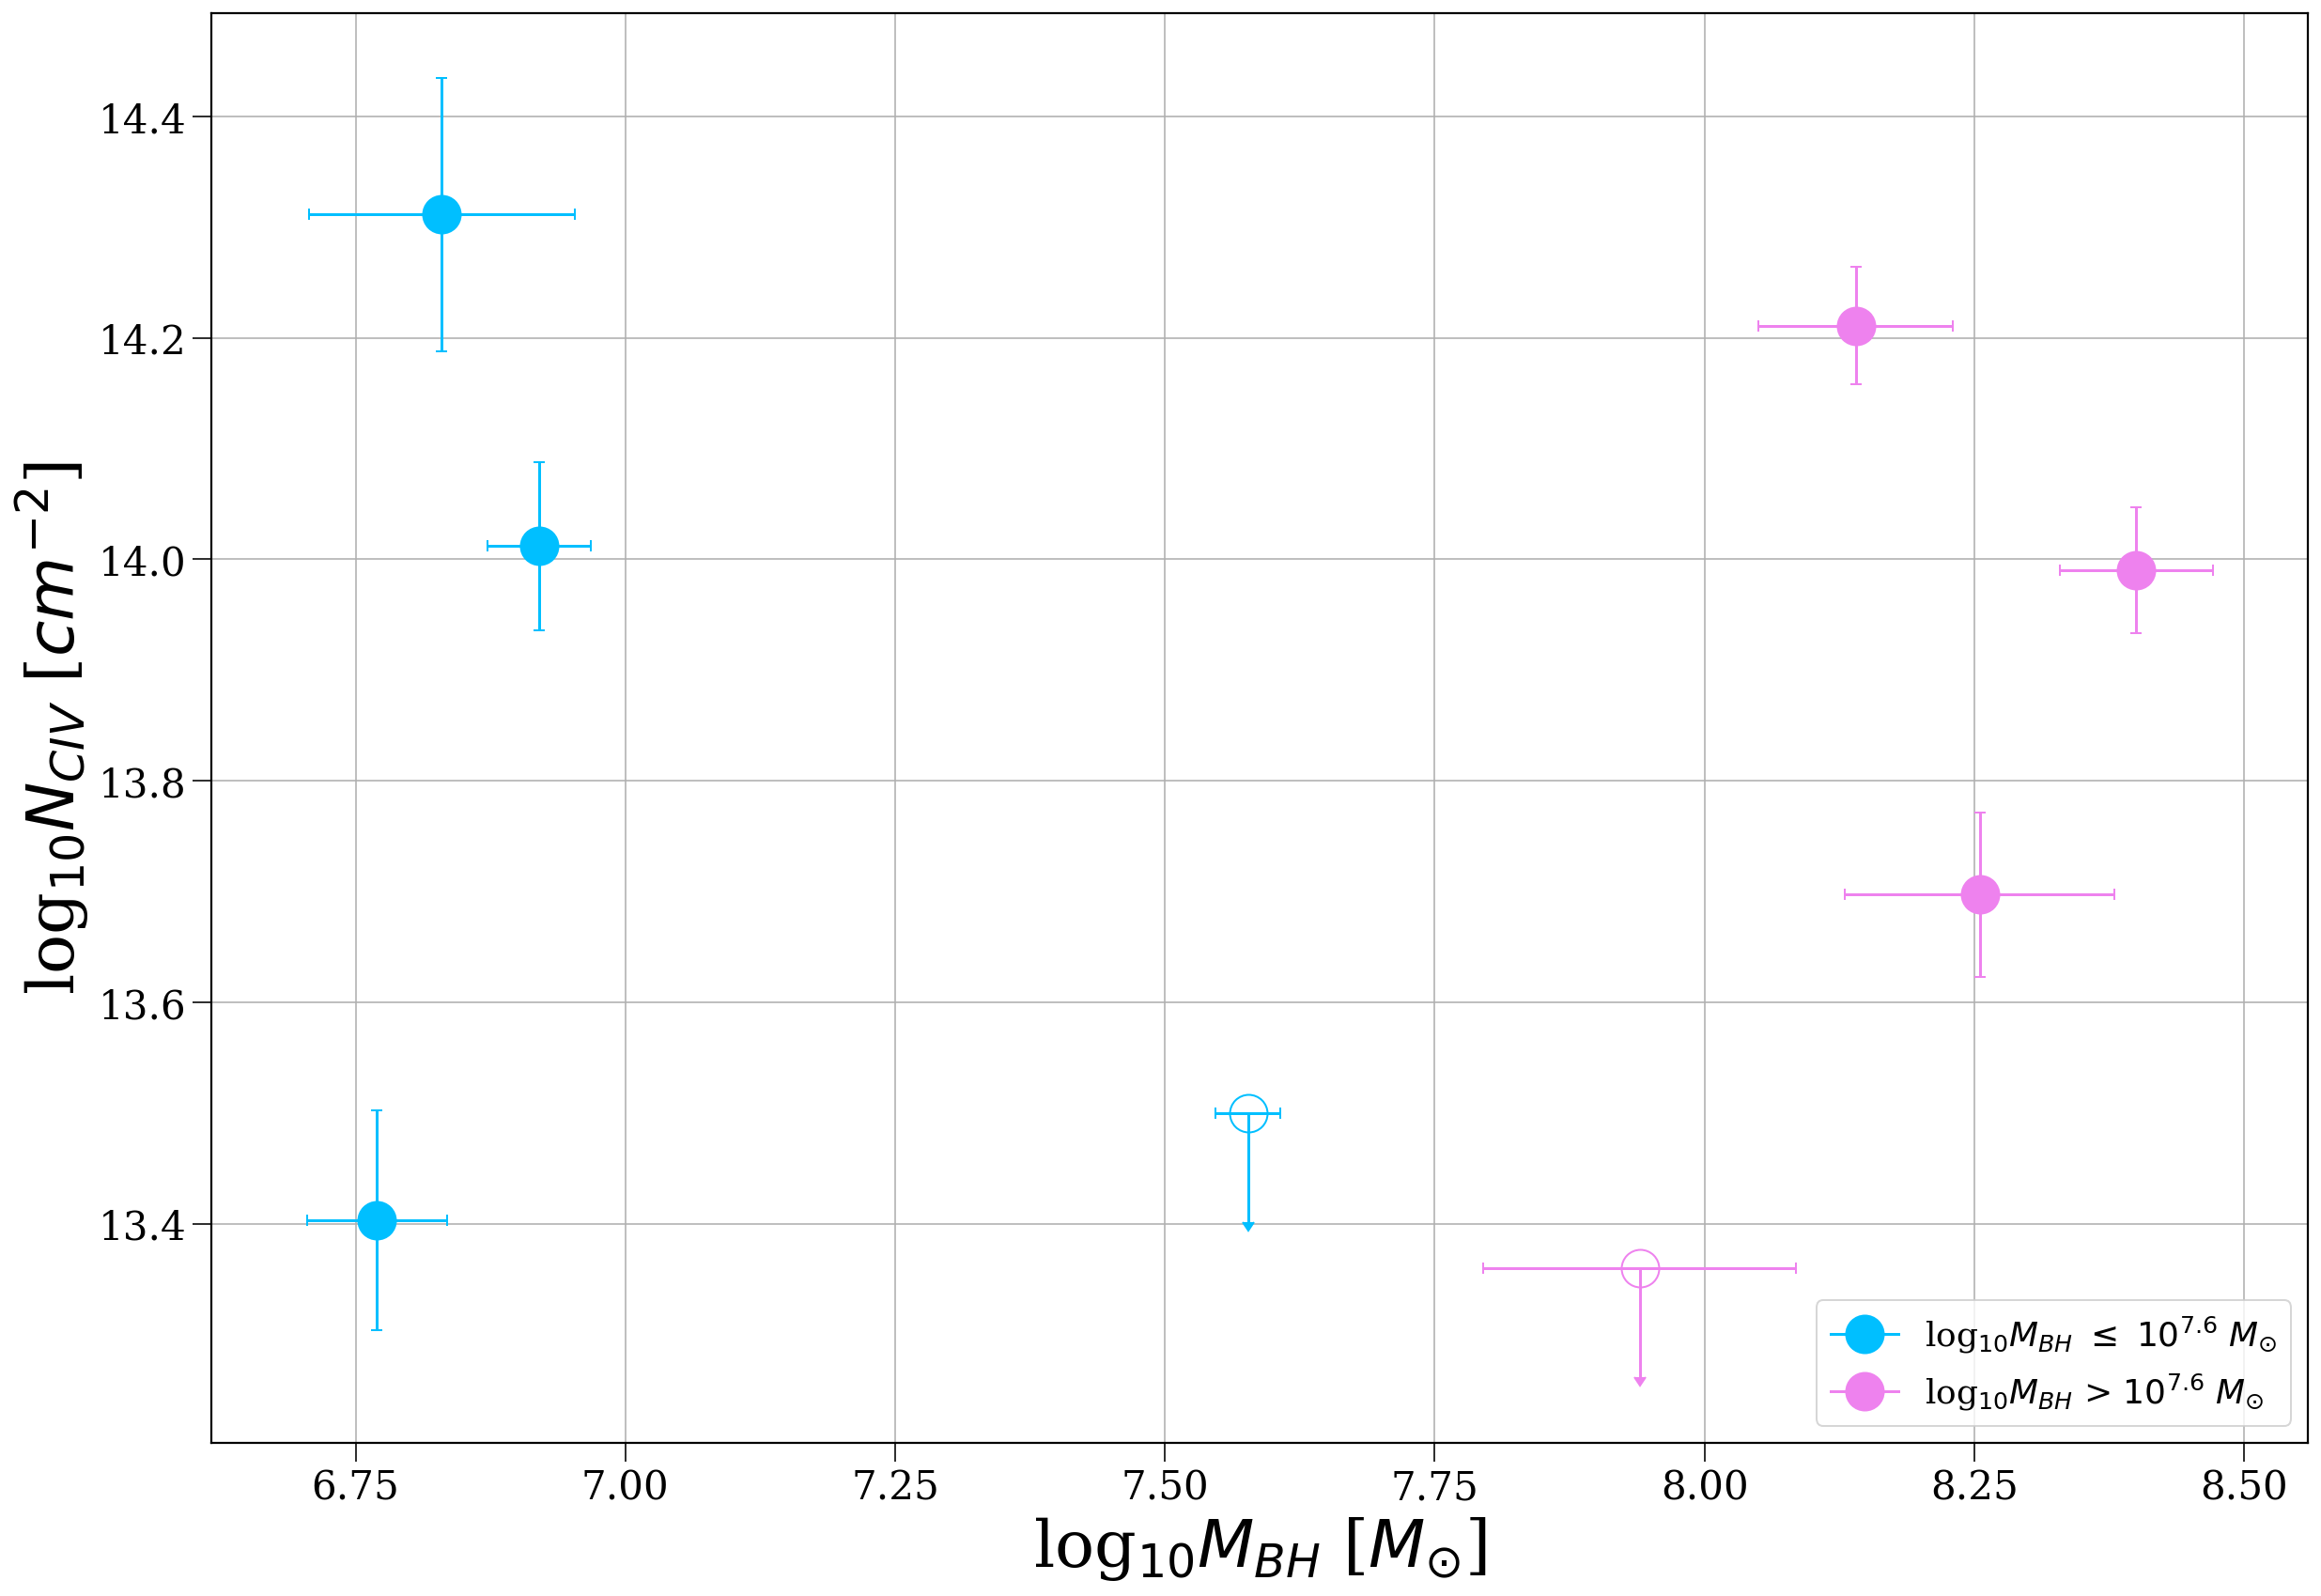

In [23]:
#NCIV vs BH Mass to see sample better 
#BH Error from Terrazas et al. 2017: https://iopscience.iop.org/article/10.3847/1538-4357/aa7d07/pdf

plt.figure(1)

########### Plotting COS-Holes Data

#J1159
plt.errorbar(bh_mass[1], civ_df_J1159['N'][0], yerr=civ_df_J1159['sigN'][0], xerr = 0.125, capsize = 3, c = 'violet', 
             marker=".", markersize=40)

#J1249
plt.errorbar(bh_mass[4], np.log10(10**civ_df_J1249['N'][2] + 10**civ_df_J1249['N'][4] + 10**civ_df_J1249['N'][6]), 
             yerr= np.sqrt(civ_df_J1249['sigN'][2]**2 + civ_df_J1249['sigN'][4]**2 + civ_df_J1249['sigN'][6]**2), 
             xerr= 0.123, capsize = 3, c = 'deepskyblue',
             label = 'log$_{10}M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$', marker=".", markersize=40)

#J1051
plt.errorbar(bh_mass[5], civ_df_J1051['N'][6], yerr= civ_df_J1051['sigN'][6], xerr= 0.071, capsize = 3, c = 'violet', 
             label = 'log$_{10}M_{BH}$ > $10^{7.6}$ $M_{\odot}$', marker=".", markersize=40)

#J1123
plt.errorbar(bh_mass[6], civ_df_J1123['N'][2], yerr=civ_df_J1123['sigN'][2], xerr=0.048, capsize = 3, c = 'deepskyblue',
             marker=".", markersize=40)

#J0246
plt.errorbar(bh_mass[7], civ_df_J0246['N'][2], yerr=civ_df_J0246['sigN'][2], xerr = 0.09, capsize = 3, c = 'violet',
             marker=".", markersize=40)

##################################################################
##### Upper Limits

#J1101 - NGC 3489 (0) (DETECTION UPPER LIMIT => not really for now )
plt.errorbar(bh_mass[0], civ_df_J1101['N'][4], yerr=civ_df_J1101['sigN'][4], xerr = 0.065, c = 'deepskyblue', 
             marker=".", capsize = 3, markersize=40)

#J1222 
plt.errorbar(bh_mass[3], np.log10(10**13.5), yerr=civ_df_J1101['sigN'][4], xerr = 0.03, uplims=True, c = 'deepskyblue', 
             marker=".", mfc='none', capsize = 3, markersize=40)

#J1235 - NGC 4564 (8)
plt.errorbar (bh_mass[8], np.log10(10**13.36), yerr=civ_df_J1101['sigN'][4], xerr= 0.145, uplims=True, c = 'violet', 
              marker=".",mfc='none', capsize = 3, markersize=40)

plt.xlabel ('log$_{10}M_{BH}$ [$M_{\odot}$]')
plt.ylabel ('log$_{10}N_{CIV}$ [$cm^{-2}$]')
plt.legend(loc=4)
plt.grid(True)
plt.show()

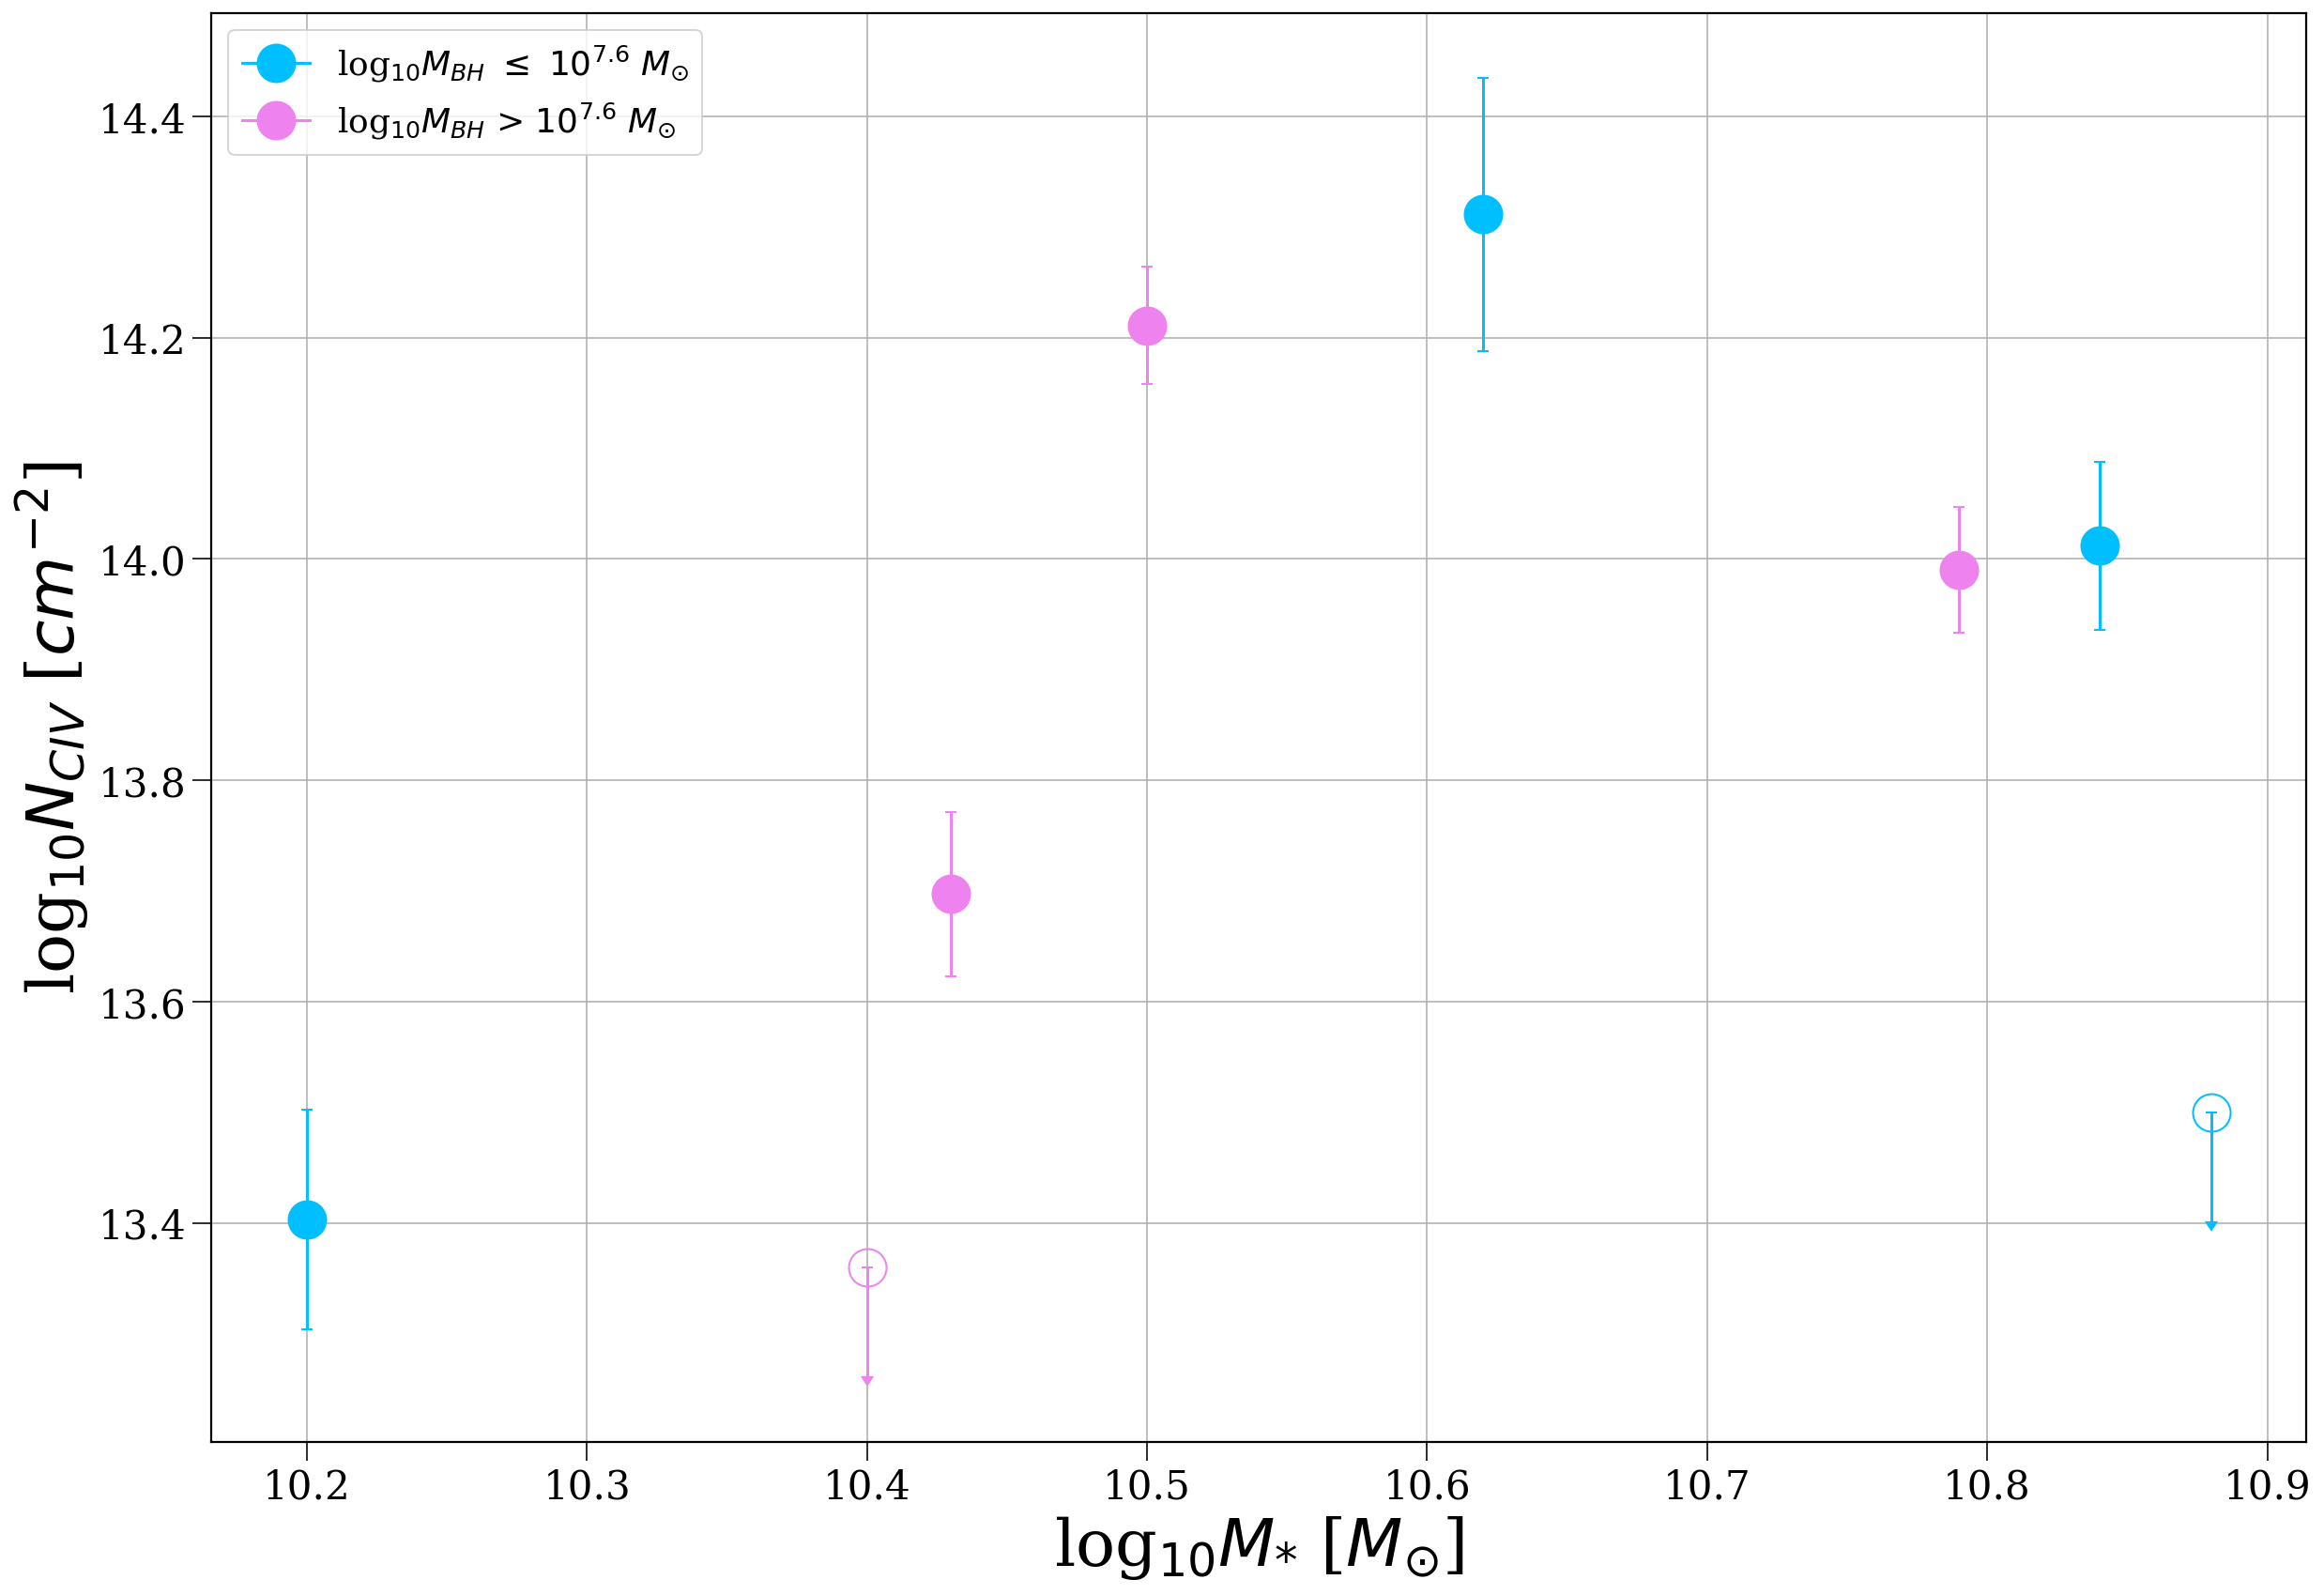

In [24]:
#NCIV vs Stellar Mass to see sample better 
#BH Error from Terrazas et al. 2017: https://iopscience.iop.org/article/10.3847/1538-4357/aa7d07/pdf

plt.figure(1)

########### Plotting COS-Holes Data

#J1159
plt.errorbar(s_mass[1], civ_df_J1159['N'][0], yerr=civ_df_J1159['sigN'][0], capsize = 3, c = 'violet', 
             marker=".", markersize=40)

#J1249
plt.errorbar(s_mass[4], np.log10(10**civ_df_J1249['N'][2] + 10**civ_df_J1249['N'][4] + 10**civ_df_J1249['N'][6]), 
             yerr= np.sqrt(civ_df_J1249['sigN'][2]**2 + civ_df_J1249['sigN'][4]**2 + civ_df_J1249['sigN'][6]**2), 
             capsize = 3, c = 'deepskyblue', label = 'log$_{10}M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$', 
             marker=".", markersize=40)

#J1051
plt.errorbar(s_mass[5], civ_df_J1051['N'][6], yerr= civ_df_J1051['sigN'][6], capsize = 3, c = 'violet', 
             label = 'log$_{10}M_{BH}$ > $10^{7.6}$ $M_{\odot}$', marker=".", markersize=40)

#J1123
plt.errorbar(s_mass[6], civ_df_J1123['N'][2], yerr=civ_df_J1123['sigN'][2], capsize = 3, c = 'deepskyblue',
             marker=".", markersize=40)

#J0246
plt.errorbar(s_mass[7], civ_df_J0246['N'][2], yerr=civ_df_J0246['sigN'][2], capsize = 3, c = 'violet',
             marker=".", markersize=40)

##################################################################
##### Upper Limits

#J1101 - NGC 3489 (0) (DETECTION UPPER LIMIT => not really for now)
plt.errorbar(s_mass[0], civ_df_J1101['N'][4], yerr=civ_df_J1101['sigN'][4], c = 'deepskyblue',
             marker=".", capsize = 3, markersize=40)

#J1222 
plt.errorbar(s_mass[3], np.log10(10**13.5), yerr=civ_df_J1101['sigN'][4], uplims=True, c = 'deepskyblue', 
             marker=".", mfc='none', capsize = 3, markersize=40)

#J1235 - NGC 4564 (8)
plt.errorbar (s_mass[8], np.log10(10**13.36), yerr=civ_df_J1101['sigN'][4], uplims=True, c = 'violet', 
              marker=".",mfc='none', capsize = 3, markersize=40)

plt.xlabel ('log$_{10}M_{*}$ [$M_{\odot}$]')
plt.ylabel ('log$_{10}N_{CIV}$ [$cm^{-2}$]')
plt.legend(loc=2)
plt.grid(True)
plt.show()

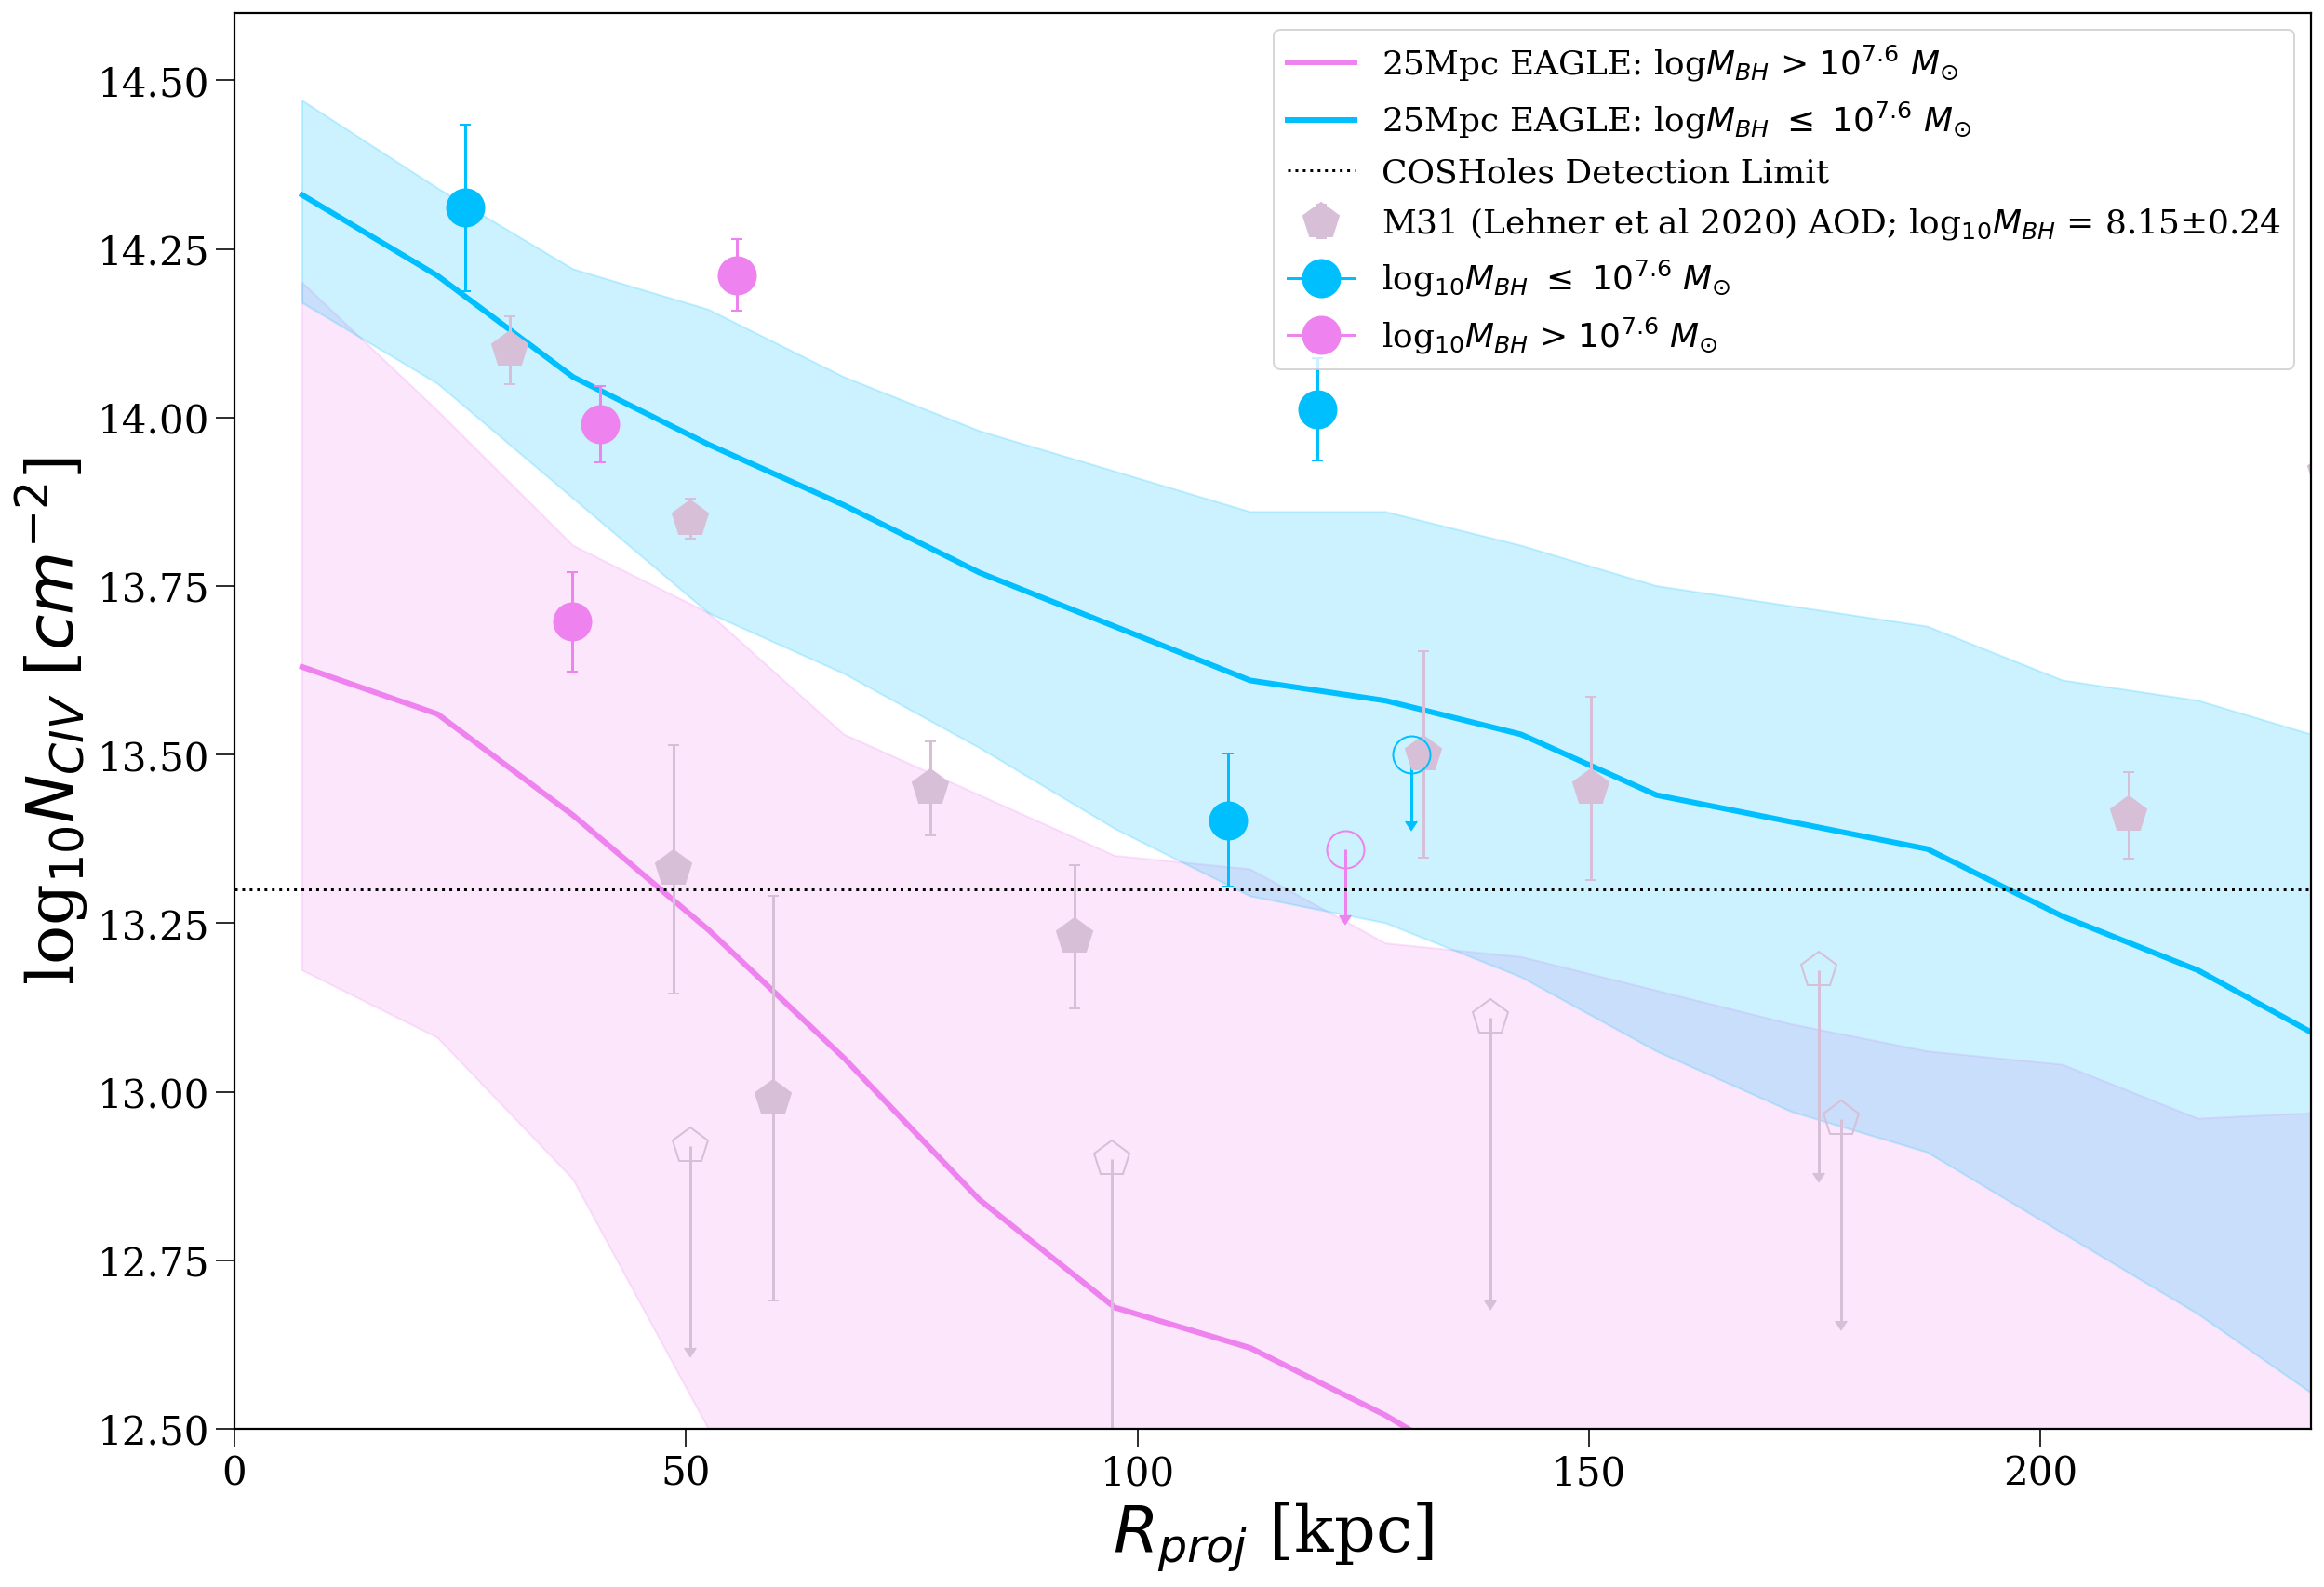

In [25]:
#Now I guess we can start plotting some things.... Lets make Fig 4 (LHS- N vs Rproj) of COS-Holes Proposal

########### Plotting Ben's Data 

plt.fill_between(b_benHbh, ben_25Hbh, ben_75Hbh, alpha = 0.2, color = 'violet')
plt.plot(b_benHbh, med_benHbh, color = 'violet', lw = 3, label = '25Mpc EAGLE: log$M_{BH}$ > $10^{7.6}$ $M_{\odot}$')
plt.fill_between(b_benLbh, ben_25Lbh, ben_75Lbh, alpha = 0.2, color = 'deepskyblue')
plt.plot(b_benLbh, med_benLbh, color = 'deepskyblue', lw = 3, label = '25Mpc EAGLE: log$M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$')

plt.figure(1, figsize=(12,8))

########################################################

# M31 information from Project AMIGA: 
# BH Mass: https://arxiv.org/pdf/1707.04001.pdf = 8.15+/- 0.24 , used lightgrey before 

##### M31 Detections (Sums) 
plt.errorbar (amiga_2_det_sum['Rad'], amiga_2_det_sum['logN'], yerr=amiga_2_det_sum['sum_elogN'],capsize = 3, c = 'thistle', 
              marker="p", markersize=20, label='M31 (Lehner et al 2020) AOD; log$_{10}M_{BH}$ = 8.15$\pm$0.24', ls='none')

##### M31 Upper Limits (Sums)
plt.errorbar (amiga_2_up_sum['Rad'], amiga_2_up_sum['logN'], yerr=amiga_2_up_sum['sum_elogN'],uplims=True, c = 'thistle', 
              marker="p",mfc='none',markersize=20, ls='none')

########################################################

########### Plotting COS-Holes Data

#J1159
plt.errorbar(rproj[1], civ_df_J1159['N'][0], yerr=civ_df_J1159['sigN'][0], capsize = 3, c = 'violet', 
             marker=".", markersize=40)

#J1249
plt.errorbar(rproj[4], np.log10(10**civ_df_J1249['N'][2] + 10**civ_df_J1249['N'][4] + 10**civ_df_J1249['N'][6]), 
             yerr= np.sqrt(civ_df_J1249['sigN'][2]**2 + civ_df_J1249['sigN'][4]**2 + civ_df_J1249['sigN'][6]**2), 
             capsize = 3, c = 'deepskyblue', label = 'log$_{10}M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$', 
             marker=".", markersize=40)

#J1051
plt.errorbar(rproj[5], civ_df_J1051['N'][6], yerr= civ_df_J1051['sigN'][6],capsize = 3, c = 'violet', 
             label = 'log$_{10}M_{BH}$ > $10^{7.6}$ $M_{\odot}$', marker=".", markersize=40)

#J1123
plt.errorbar(rproj[6], civ_df_J1123['N'][2], yerr=civ_df_J1123['sigN'][2],capsize = 3, c = 'deepskyblue',
             marker=".", markersize=40)

#J0246
plt.errorbar(rproj[7], civ_df_J0246['N'][2], civ_df_J0246['sigN'][2], capsize = 3, c = 'violet',
             marker=".", markersize=40)

##################################################################
##### Upper Limits

#J1101 - NGC 3489 (0) (DETECTION UPPER LIMIT => not really for now )
plt.errorbar(rproj[0], civ_df_J1101['N'][4], yerr=civ_df_J1101['sigN'][4], c = 'deepskyblue', capsize = 3,
             marker=".", markersize=40)

#J1222 - NGC 4248 (3)
plt.errorbar (rproj[3], np.log10(10**13.5), yerr=civ_df_J1101['sigN'][4],uplims=True, c = 'deepskyblue', 
              marker=".",mfc='none',markersize=40)

#J1235 - NGC 4564 (8)
plt.errorbar (rproj[8], np.log10(10**13.36), yerr=civ_df_J1101['sigN'][4],uplims=True, c = 'violet', 
              marker=".",mfc='none',markersize=40)

plt.axhline(13.3, c='k', ls=':', label='COSHoles Detection Limit')
#plt.axvline(150, c='k', ls='-')
plt.ylim(12.5, 14.6)
plt.xlim(0, 230)
plt.xlabel ('$R_{proj}$ [kpc]')
plt.ylabel ('log$_{10}N_{CIV}$ [$cm^{-2}$]')
plt.legend(loc=1)
#plt.grid(True)
plt.show()

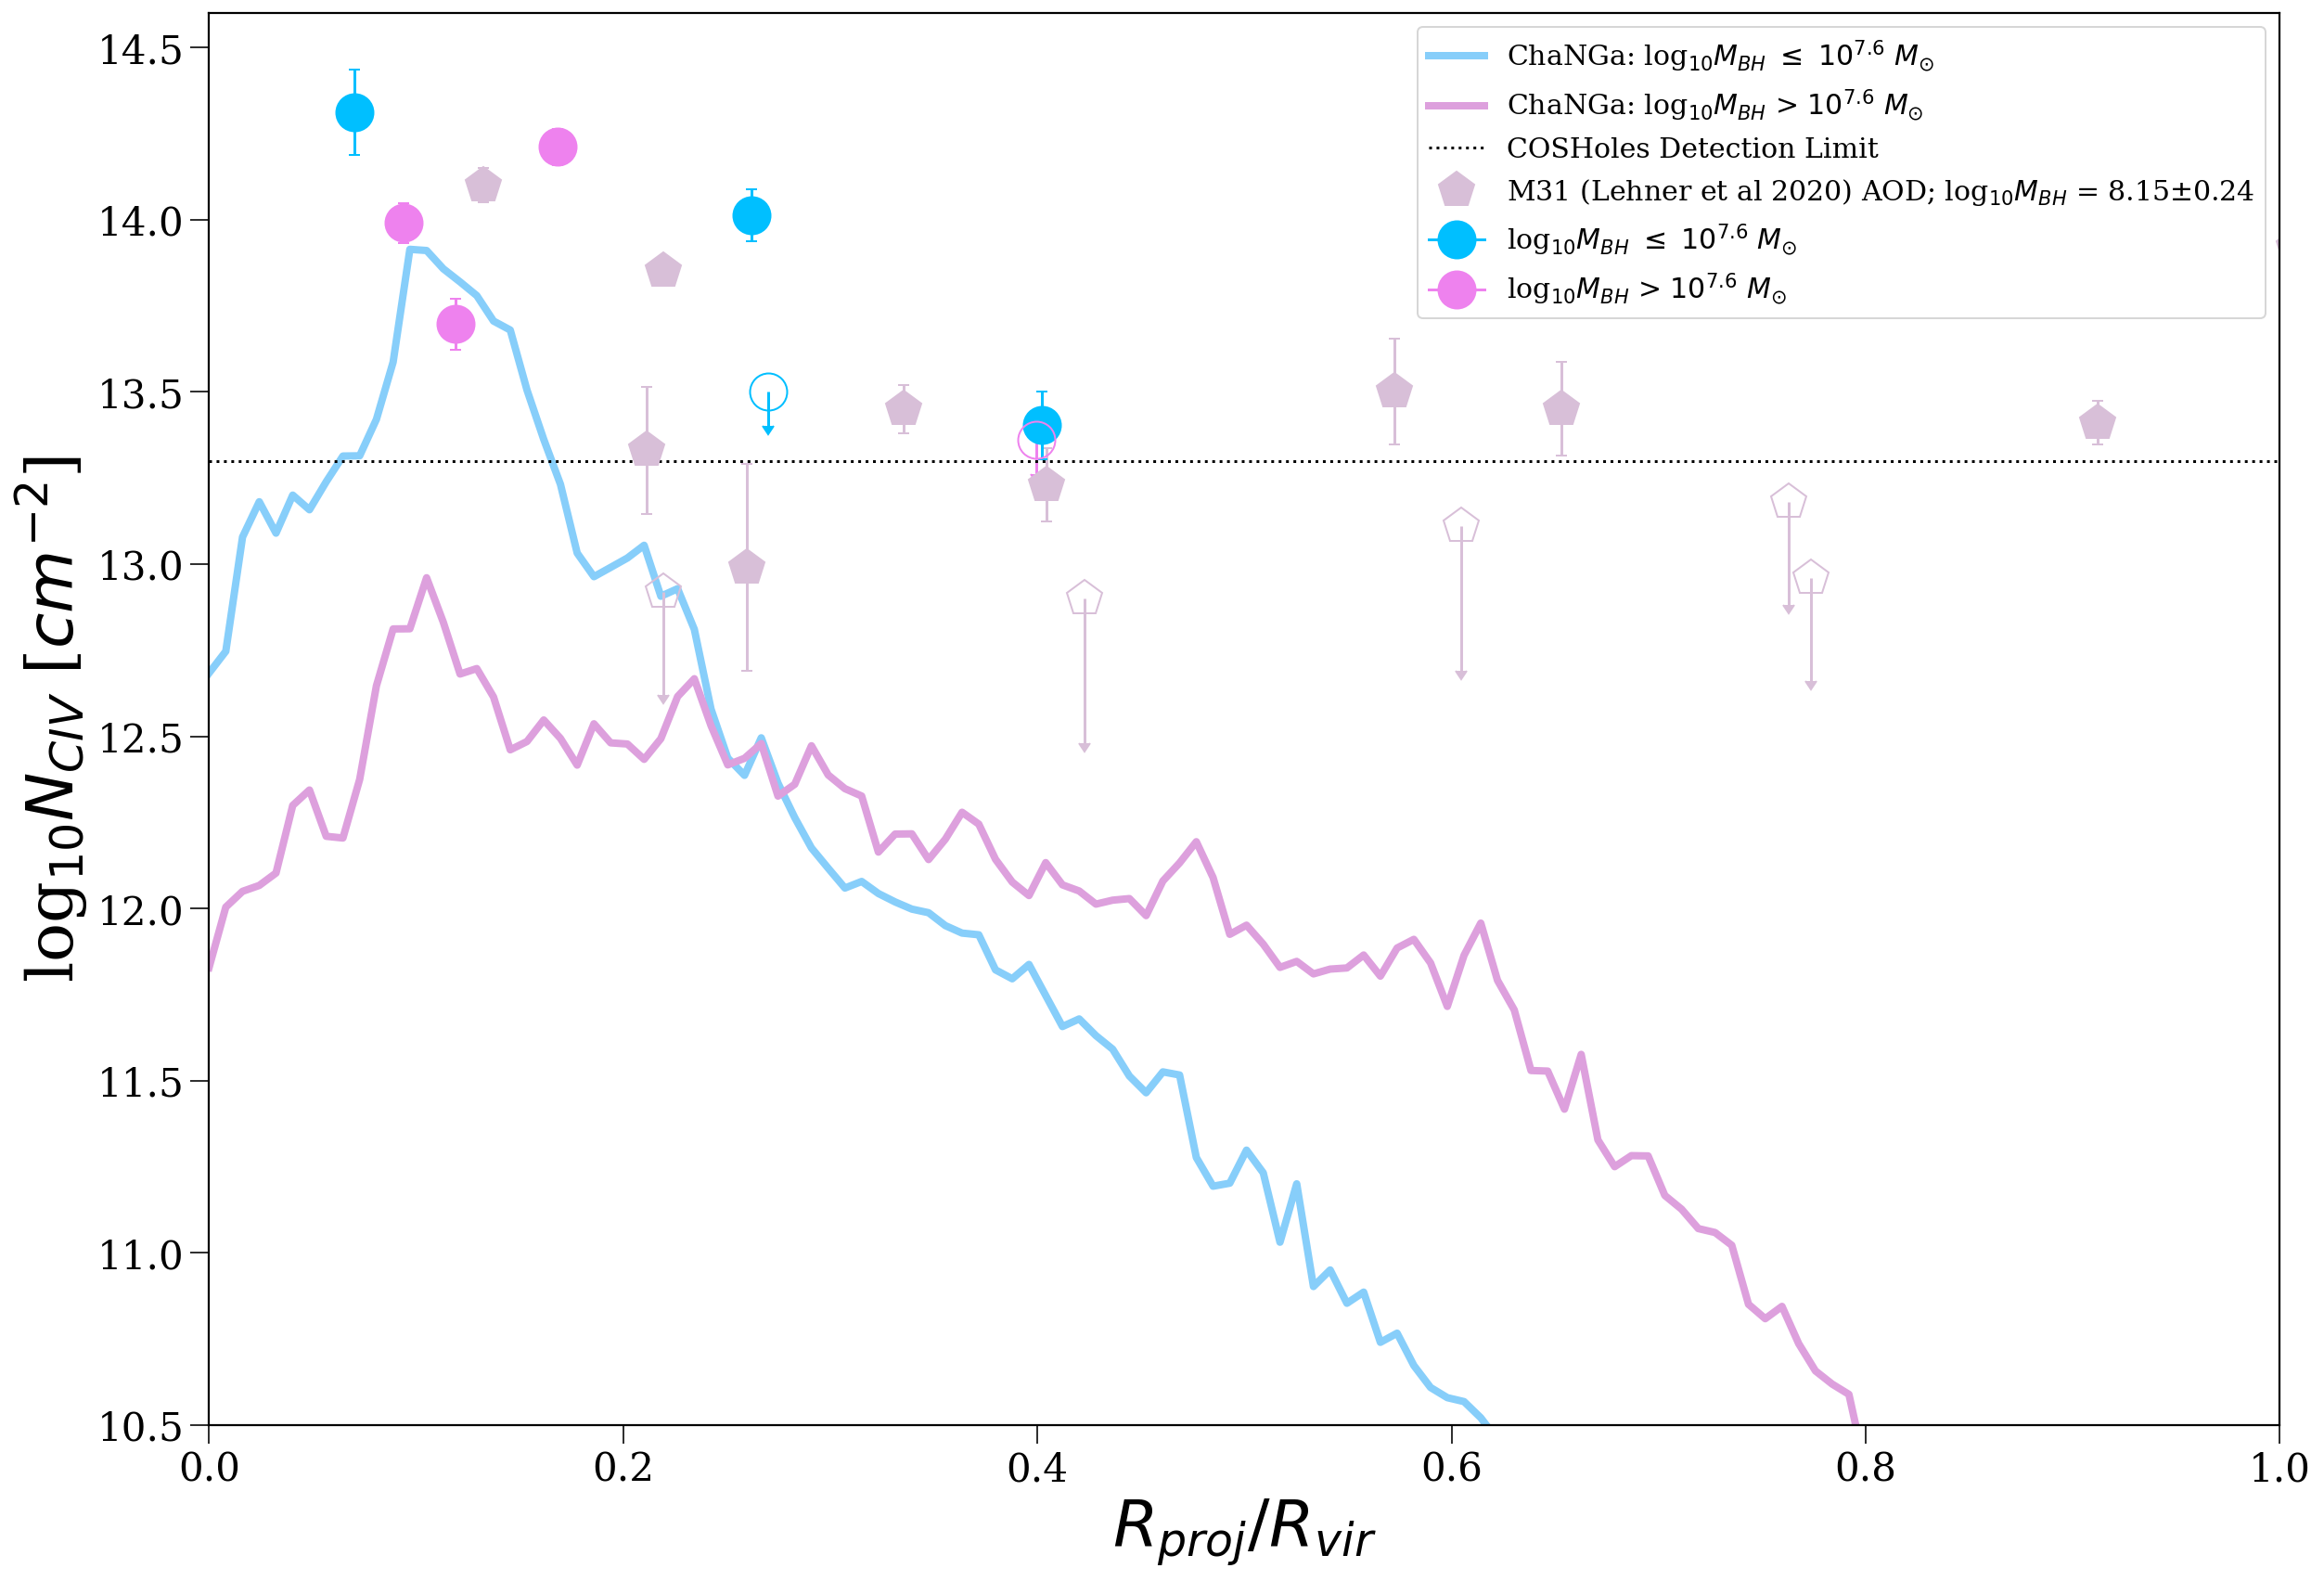

In [26]:
#Now I guess we can start plotting some things.... Lets make Fig 4 (RHS- N vs Rproj/Rvir) of COS-Holes Proposal

#Plotting the models from ChaNGa: Romulus25 cosmological volume, Tremmel et. al 2017
plt.plot(r25_rprv,r25_lowBH_civ, c = 'lightskyblue', linewidth = 4, ls = '-',
         label = 'ChaNGa: log$_{10}M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$')
plt.plot(r25_rprv,r25_highBH_civ, c = 'plum', linewidth = 4, ls = '-',
         label = 'ChaNGa: log$_{10}M_{BH}$ > $10^{7.6}$ $M_{\odot}$')

########### Plotting Nicole's ChaNGA Models (Starforming) => Romulus25 cosmological volume, Tremmel et. al 2017
#plt.plot(CC_rprv,CC_lowBH_civ, c = 'lightskyblue', linewidth = 4, 
#         label = 'ChaNGa (SF): log$_{10}M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$')
#plt.plot(CC_rprv,CC_highBH_civ, c = 'violet', linewidth = 4, 
#         label = 'ChaNGa (SF): log$_{10}M_{BH}$ > $10^{7.6}$ $M_{\odot}$')

########################################################

# M31 information from Project AMIGA: 
# BH Mass: https://arxiv.org/pdf/1707.04001.pdf = 8.15+/- 0.24 

##### M31 Detections (Sums) 
plt.errorbar (amiga_det_RRvir, amiga_2_det_sum['logN'], yerr=amiga_2_det_sum['sum_elogN'],capsize = 3, c = 'thistle', 
              marker="p", markersize=20, label='M31 (Lehner et al 2020) AOD; log$_{10}M_{BH}$ = 8.15$\pm$0.24', ls='none')

##### M31 Upper Limits (Sums)
plt.errorbar (amiga_up_RRvir, amiga_2_up_sum['logN'], yerr=amiga_2_up_sum['sum_elogN'],uplims=True, c = 'thistle', 
              marker="p",mfc='none',markersize=20, ls='none')

########################################################

########### Plotting COS-Holes Data

#J1159
plt.errorbar(rproj[1]/rvir[1], civ_df_J1159['N'][0], yerr=civ_df_J1159['sigN'][0], capsize = 3, c = 'violet', 
             marker=".", markersize=40)

#J1249
plt.errorbar(rproj[4]/rvir[4], np.log10(10**civ_df_J1249['N'][2] + 10**civ_df_J1249['N'][4] + 10**civ_df_J1249['N'][6]), 
             yerr= np.sqrt(civ_df_J1249['sigN'][2]**2 + civ_df_J1249['sigN'][4]**2 + civ_df_J1249['sigN'][6]**2), 
             capsize = 3, c = 'deepskyblue', label = 'log$_{10}M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$', 
             marker=".", markersize=40)

#J1051
plt.errorbar(rproj[5]/rvir[5], civ_df_J1051['N'][6], yerr= civ_df_J1051['sigN'][6],capsize = 3, c = 'violet', 
             label = 'log$_{10}M_{BH}$ > $10^{7.6}$ $M_{\odot}$', marker=".", markersize=40)

#J1123
plt.errorbar(rproj[6]/rvir[6], civ_df_J1123['N'][2], yerr=civ_df_J1123['sigN'][2],capsize = 3, c = 'deepskyblue',
             marker=".", markersize=40)

#J0246
plt.errorbar(rproj[7]/rvir[7], civ_df_J0246['N'][2], civ_df_J0246['sigN'][2], capsize = 3, c = 'violet',
             marker=".", markersize=40)

##################################################################
##### Upper Limits

#J1101 - NGC 3489 (0) (DETECTION UPPER LIMIT => not really for now )
plt.errorbar(rproj[0]/rvir[0], civ_df_J1101['N'][4], yerr=civ_df_J1101['sigN'][4], c = 'deepskyblue', capsize = 3,
             marker=".", markersize=40)

#J1222 - NGC 4248 (3)
plt.errorbar (rproj[3]/rvir[3], np.log10(10**13.5), yerr=civ_df_J1101['sigN'][4],uplims=True, c = 'deepskyblue', 
              marker=".",mfc='none',markersize=40)


#J1235 - NGC 4564 (8)
plt.errorbar (rproj[8]/rvir[8], np.log10(10**13.36), yerr=civ_df_J1101['sigN'][4],uplims=True, c = 'violet', 
              marker=".",mfc='none',markersize=40)

plt.axhline(13.3, c='k', ls=':', label='COSHoles Detection Limit')
#plt.axvline(150, c='k', ls='-')
plt.ylim(10.5, 14.6)
plt.xlim(0, 1)
plt.xlabel ('$R_{proj}/R_{vir}$')
plt.ylabel ('log$_{10}N_{CIV}$ [$cm^{-2}$]')
plt.legend(loc=1, fontsize = 15)
#plt.grid(True)
plt.show()

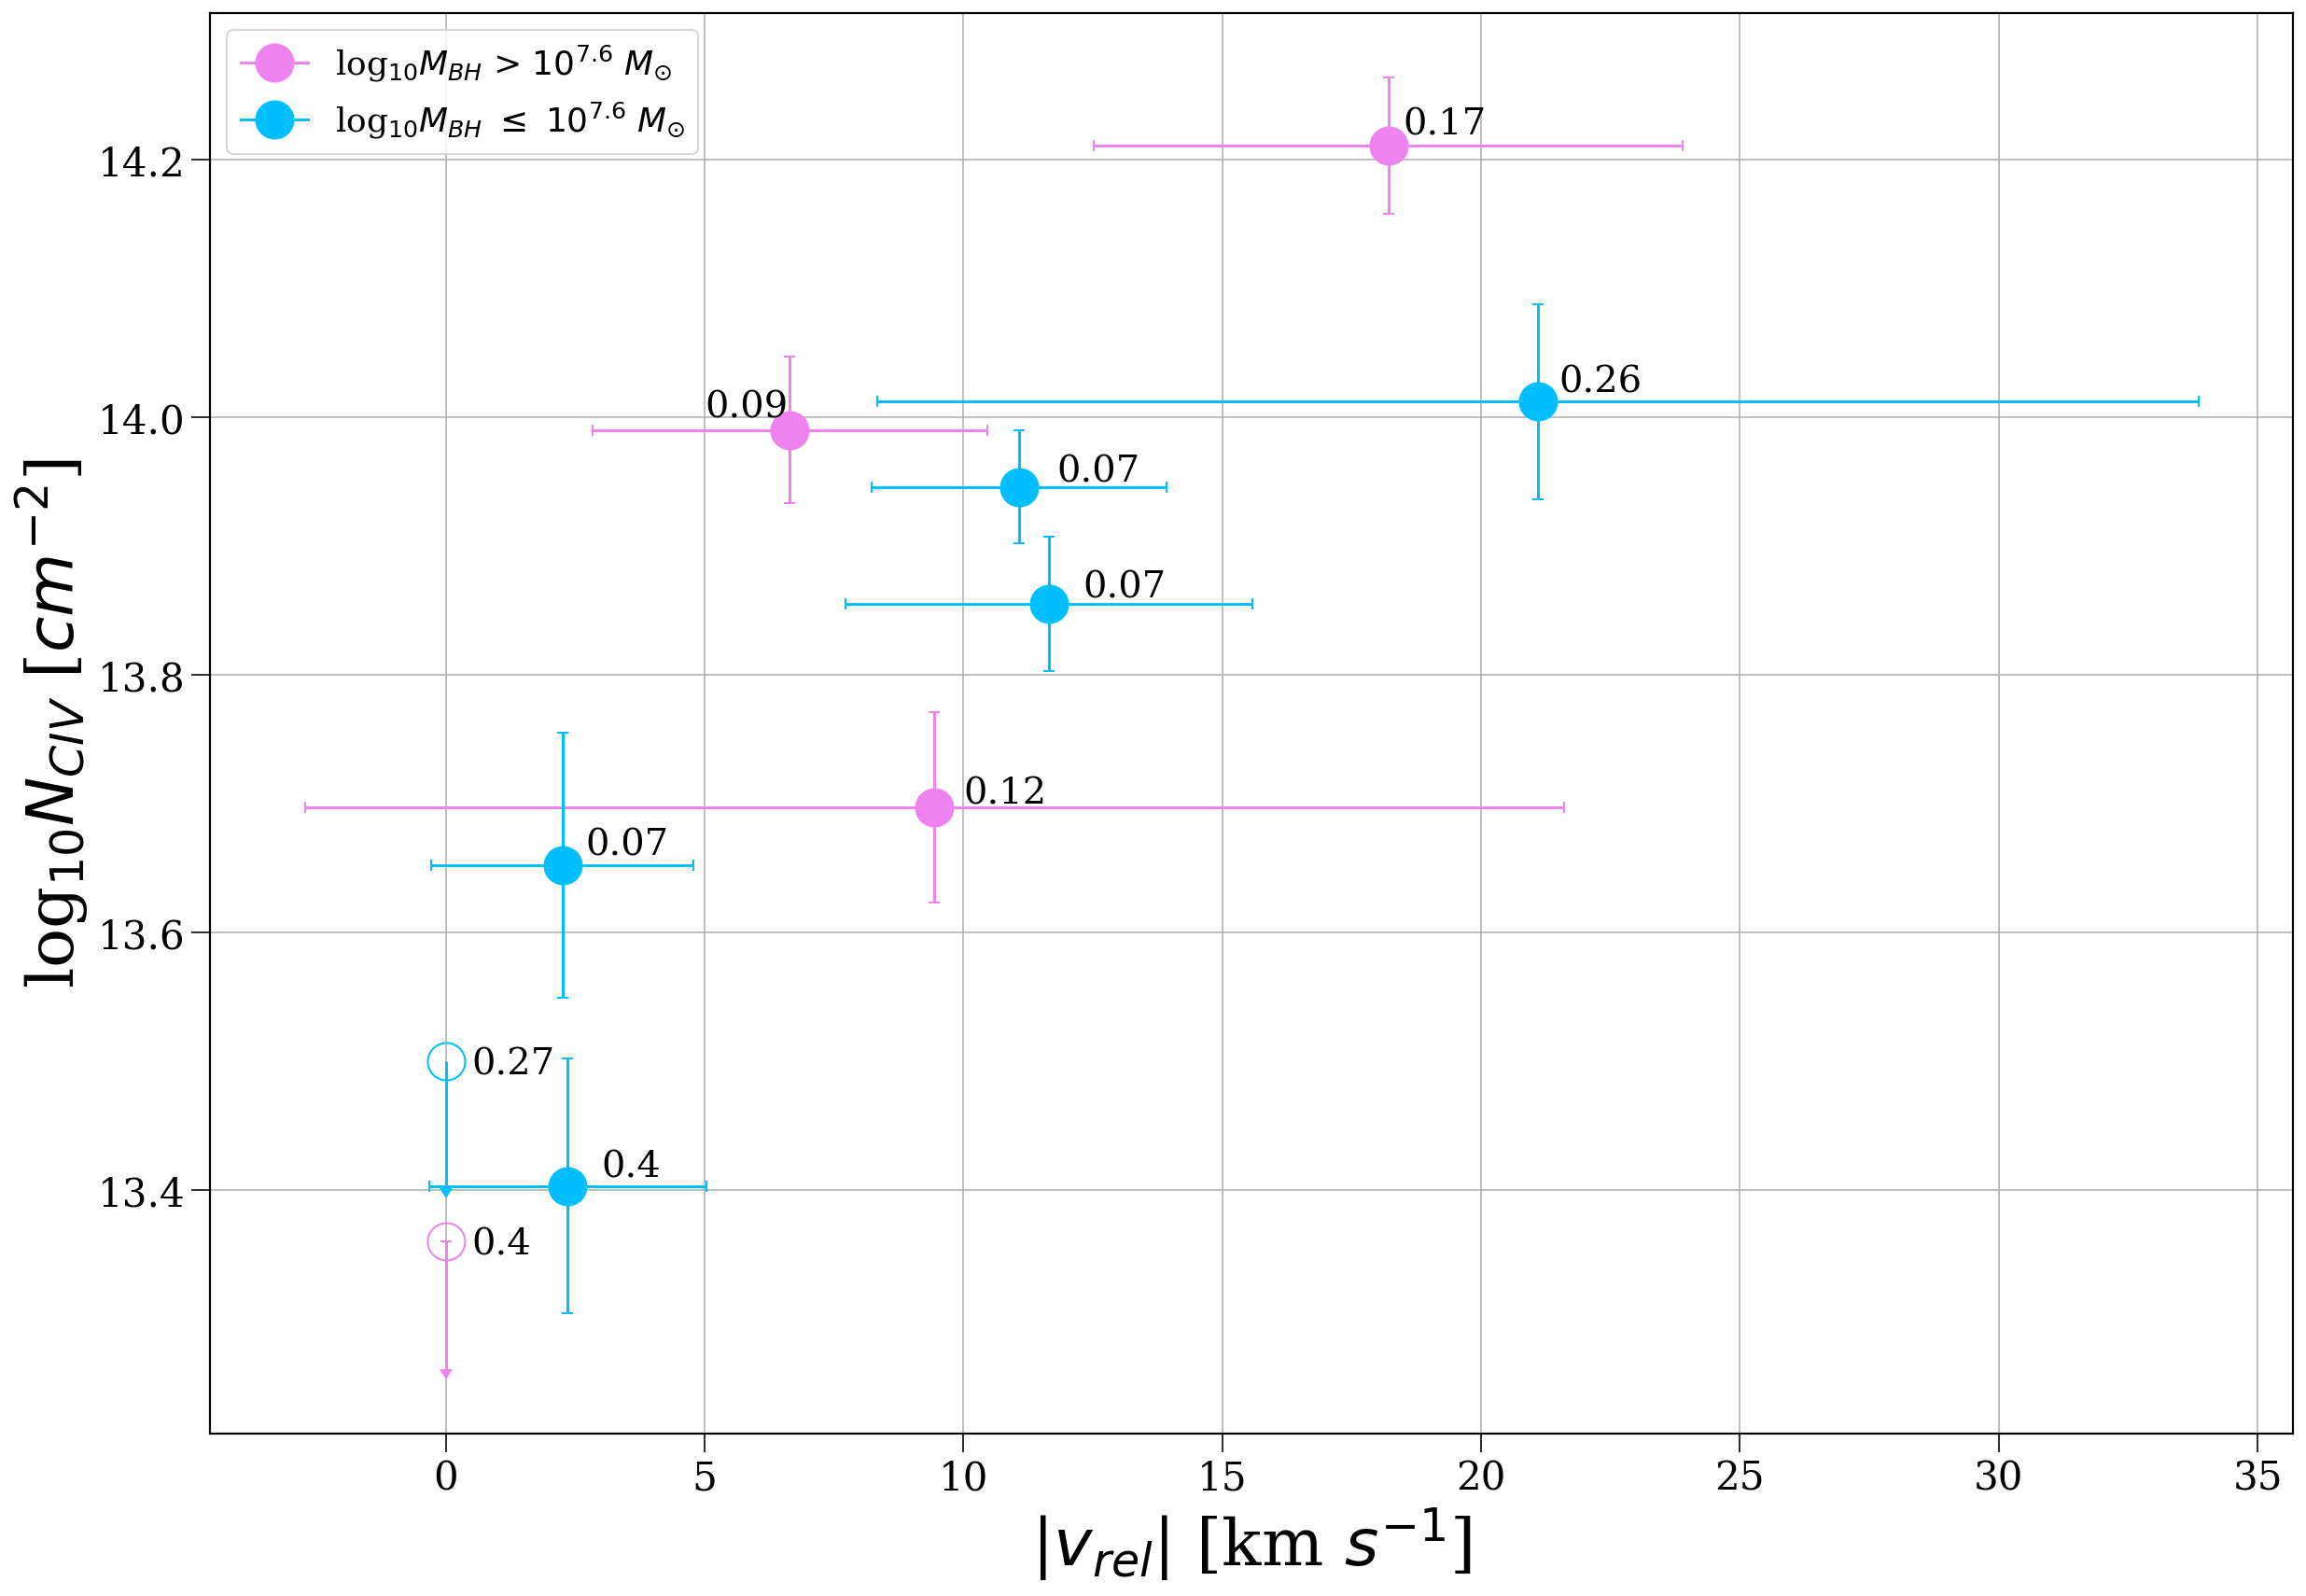

In [39]:
#PRELIMINARY NCIV vs velocity (waiting to hear back from Terrazas
#SFR from Terrazas et al. 2017: https://iopscience.iop.org/article/10.3847/1538-4357/aa7d07/pdf

plt.figure(1)

########### Plotting COS-Holes Data

#J1159
plt.errorbar(np.absolute(vel_J1159[0]), civ_df_J1159['N'][0], yerr=civ_df_J1159['sigN'][0], xerr=np.abs(sigvel_J1159[0]), capsize = 3, c = 'violet', 
             marker=".", markersize=40)
plt.annotate(f"{np.round(rr[1],2)}", (10, 13.7), fontsize=20)

#J1249
plt.errorbar(np.abs(vel_J1249[2]), civ_df_J1249['N'][2], yerr= civ_df_J1249['sigN'][2], xerr=np.abs(sigvel_J1249[2]),
             capsize = 3, c = 'deepskyblue', marker=".", markersize=40)
plt.annotate(f"{np.round(rr[3],2)}", (12.3, 13.86), fontsize=20)
plt.errorbar(np.abs(vel_J1249[4]), civ_df_J1249['N'][4], yerr= civ_df_J1249['sigN'][4], xerr=np.abs(sigvel_J1249[4]),
             capsize = 3, c = 'deepskyblue', marker=".", markersize=40)
plt.annotate(f"{np.round(rr[3],2)}", (2.7, 13.66), fontsize=20)
plt.errorbar(np.abs(vel_J1249[6]), civ_df_J1249['N'][6], yerr= civ_df_J1249['sigN'][6], xerr=np.abs(sigvel_J1249[6]),
             capsize = 3, c = 'deepskyblue', marker=".", markersize=40)
plt.annotate(f"{np.round(rr[3],2)}", (11.8, 13.95), fontsize=20)

#J1051
plt.errorbar(np.abs(vel_J1051[6]), civ_df_J1051['N'][6], yerr= civ_df_J1051['sigN'][6], xerr=np.abs(sigvel_J1051[6]), capsize = 3, c = 'violet', 
             label = 'log$_{10}M_{BH}$ > $10^{7.6}$ $M_{\odot}$', marker=".", markersize=40)
plt.annotate(f"{np.round(rr[4],2)}", (5, 14), fontsize=20)

#J1123
plt.errorbar(np.abs(vel_J1123[2]), civ_df_J1123['N'][2], yerr=civ_df_J1123['sigN'][2], xerr=np.abs(sigvel_J1123[2]), capsize = 3, 
             c = 'deepskyblue', label = 'log$_{10}M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$', marker=".", markersize=40)
plt.annotate(f"{np.round(rr[5],2)}", (21.5, 14.02), fontsize=20)

#J0246
plt.errorbar(np.abs(vel_J0246[2]), civ_df_J0246['N'][2], yerr=civ_df_J0246['sigN'][2], xerr=np.abs(sigvel_J0246[2]), capsize = 3, c = 'violet',
             marker=".", markersize=40)
plt.annotate(f"{np.round(rr[6],2)}", (18.5, 14.22), fontsize=20)

##################################################################
##### Upper Limits

#J1101 - NGC 3489 (0) (DETECTION UPPER LIMIT => not really for now )
plt.errorbar(np.abs(vel_J1101[4]), civ_df_J1101['N'][4], yerr=civ_df_J1101['sigN'][4], xerr=np.abs(sigvel_J1101[0]), 
             c = 'deepskyblue', marker=".", capsize = 3, markersize=40)
plt.annotate(f"{np.round(rr[0],2)}", (3, 13.41), fontsize=20)

#J1222 - NGC 4248 (3)
plt.errorbar (0, np.log10(10**13.5), yerr=civ_df_J1101['sigN'][4],uplims=True, c = 'deepskyblue', 
              marker=".",mfc='none',markersize=40)
plt.annotate(f"{np.round(rr[2],2)}", (0.5, 13.49), fontsize=20)

#J1235 - NGC 4564 (8)
plt.errorbar (0, np.log10(10**13.36), yerr=civ_df_J1101['sigN'][4], uplims=True, c = 'violet', 
              marker=".",mfc='none', capsize = 3, markersize=40)
plt.annotate(f"{np.round(rr[7],2)}", (0.5, 13.35), fontsize=20)

plt.xlabel ('|$v_{rel}$| [km $s^{-1}$]')
plt.ylabel ('log$_{10}N_{CIV}$ [$cm^{-2}$]')
plt.legend(loc=2)
plt.grid(True)
plt.show()

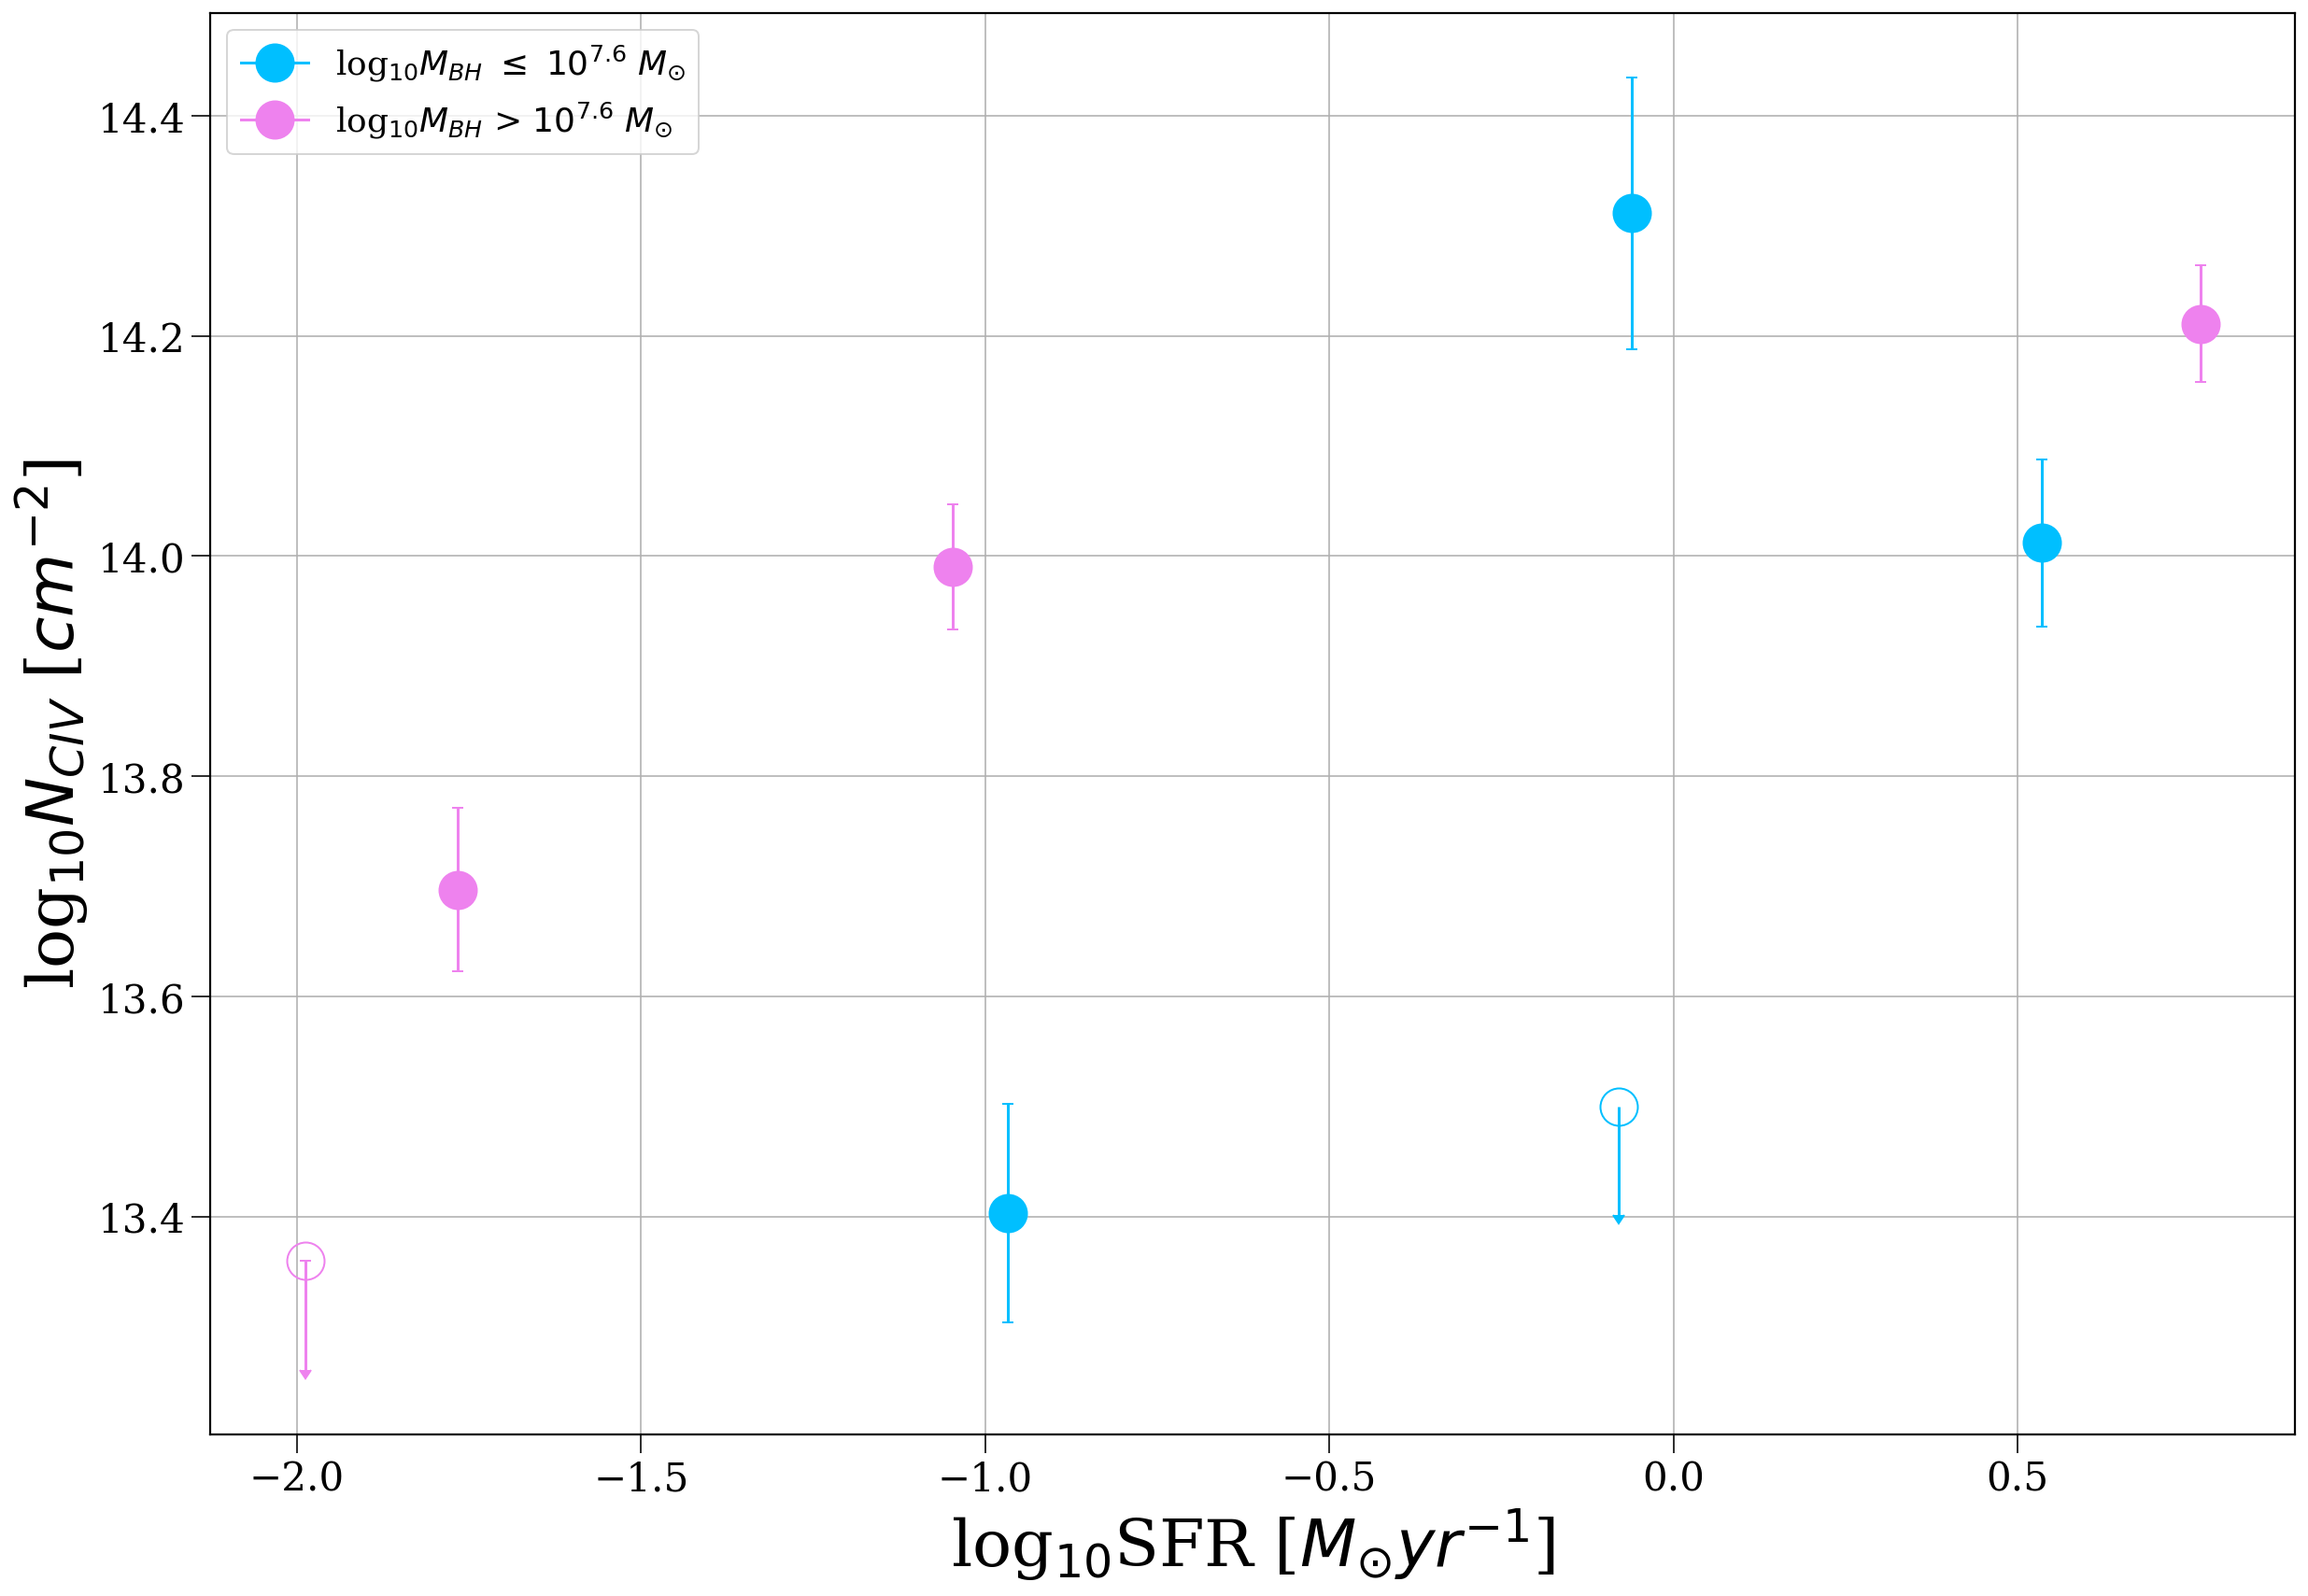

In [40]:
#PRELIMINARY NCIV vs SFR (waiting to hear back from Terrazas
#SFR from Terrazas et al. 2017: https://iopscience.iop.org/article/10.3847/1538-4357/aa7d07/pdf

plt.figure(1)

########### Plotting COS-Holes Data

#J1159
plt.errorbar(-1.767, civ_df_J1159['N'][0], yerr=civ_df_J1159['sigN'][0], capsize = 3, c = 'violet', 
             marker=".", markersize=40)

#J1249
plt.errorbar(-0.061, np.log10(10**civ_df_J1249['N'][2] + 10**civ_df_J1249['N'][4] + 10**civ_df_J1249['N'][6]), 
             yerr= np.sqrt(civ_df_J1249['sigN'][2]**2 + civ_df_J1249['sigN'][4]**2 + civ_df_J1249['sigN'][6]**2), 
             capsize = 3, c = 'deepskyblue', label = 'log$_{10}M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$', marker=".", markersize=40)

#J1051
plt.errorbar(-1.047, civ_df_J1051['N'][6], yerr= civ_df_J1051['sigN'][6], capsize = 3, c = 'violet', 
             label = 'log$_{10}M_{BH}$ > $10^{7.6}$ $M_{\odot}$', marker=".", markersize=40)

#J1123
plt.errorbar(0.536, civ_df_J1123['N'][2], yerr=civ_df_J1123['sigN'][2], capsize = 3, c = 'deepskyblue',
             marker=".", markersize=40)

#J0246
plt.errorbar(0.766, civ_df_J0246['N'][2], yerr=civ_df_J0246['sigN'][2], capsize = 3, c = 'violet',
             marker=".", markersize=40)

##################################################################
##### Upper Limits

#J1101 - NGC 3489 (0) (DETECTION UPPER LIMIT => not really for now )
plt.errorbar(-0.967, civ_df_J1101['N'][4], yerr=civ_df_J1101['sigN'][4], c = 'deepskyblue', 
             marker=".", capsize = 3, markersize=40)

#J1222 - NGC 4248 (3)
plt.errorbar (-0.08, np.log10(10**13.5), yerr=civ_df_J1101['sigN'][4],uplims=True, c = 'deepskyblue', 
              marker=".",mfc='none',markersize=40)

#J1235 - NGC 4564 (8)
plt.errorbar (-1.988, np.log10(10**13.36), yerr=civ_df_J1101['sigN'][4], uplims=True, c = 'violet', 
              marker=".",mfc='none', capsize = 3, markersize=40)

plt.xlabel ('log$_{10}$SFR [$M_{\odot} yr^{-1}$]')
plt.ylabel ('log$_{10}N_{CIV}$ [$cm^{-2}$]')
plt.legend(loc=2)
plt.grid(True)
plt.show()

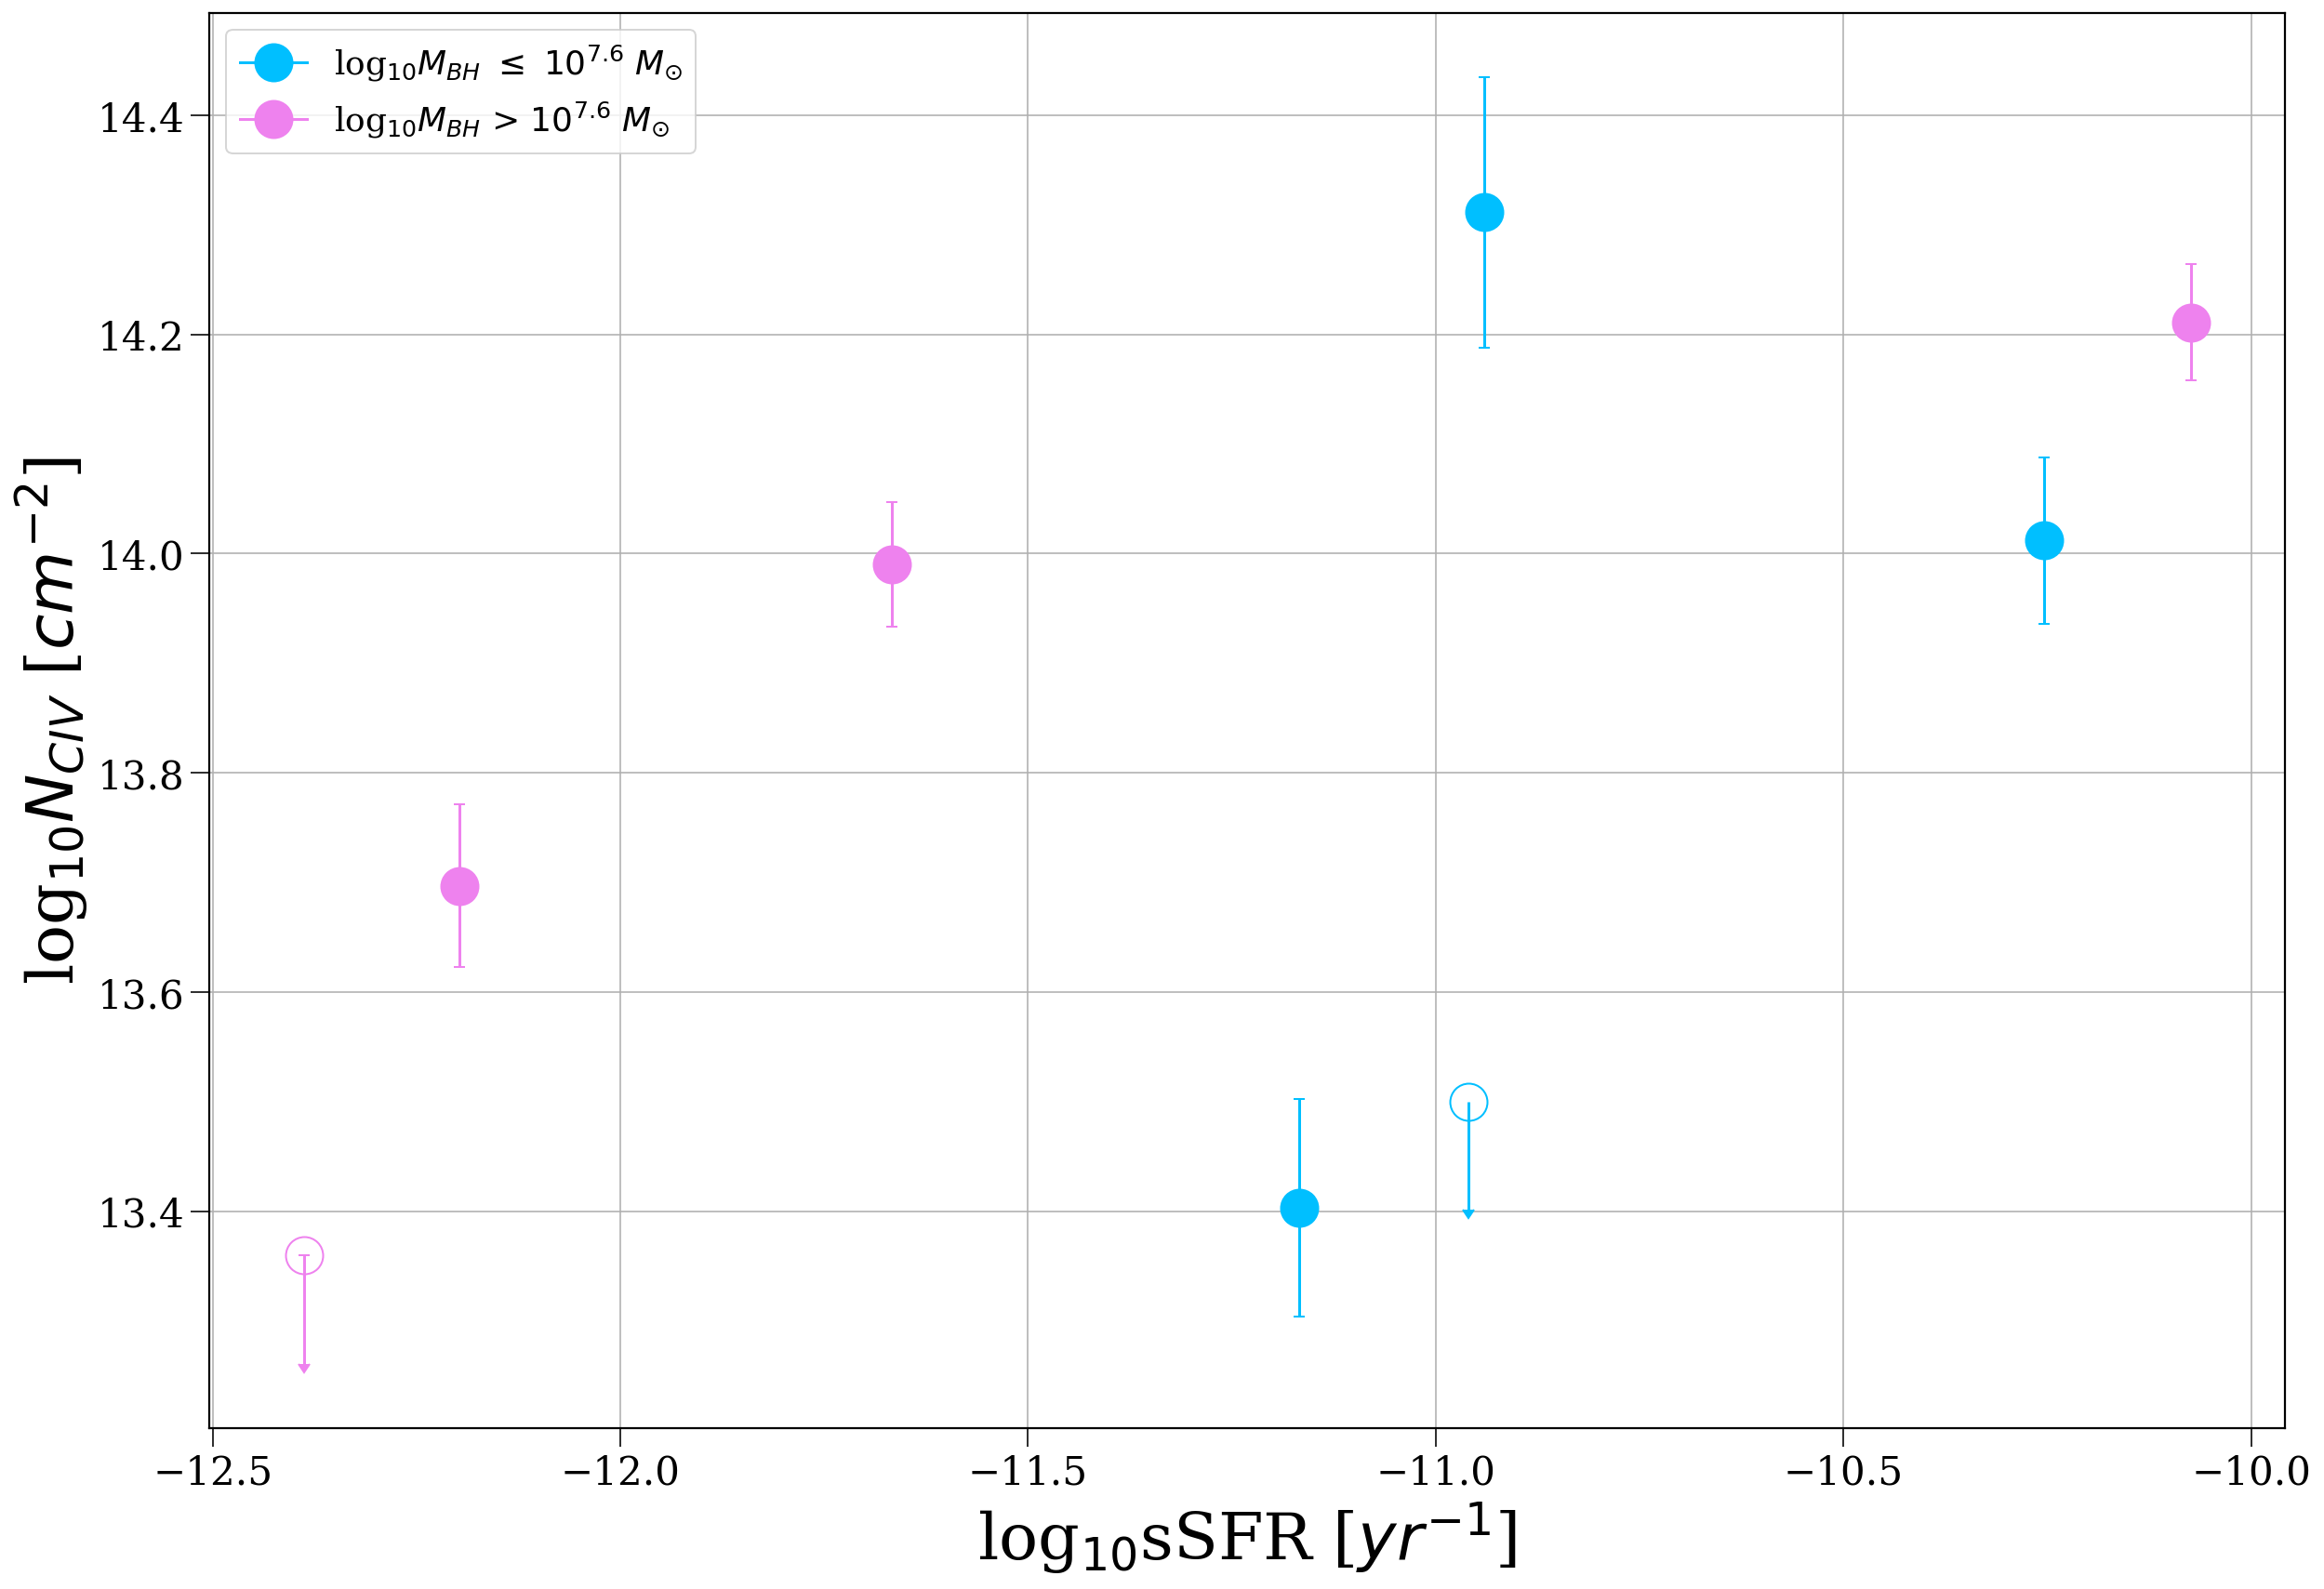

In [28]:
#PRELIMINARY NCIV vs SFR (waiting to hear back from Terrazas
#SFR from Terrazas et al. 2017: https://iopscience.iop.org/article/10.3847/1538-4357/aa7d07/pdf

plt.figure(1)

########### Plotting COS-Holes Data

#J1159
plt.errorbar(-1.767-s_mass[1], civ_df_J1159['N'][0], yerr=civ_df_J1159['sigN'][0], capsize = 3, c = 'violet', 
             marker=".", markersize=40)

#J1249
plt.errorbar(-0.061-(s_mass[3]), np.log10(10**civ_df_J1249['N'][2] + 10**civ_df_J1249['N'][4] + 10**civ_df_J1249['N'][6]), 
             yerr= np.sqrt(civ_df_J1249['sigN'][2]**2 + civ_df_J1249['sigN'][4]**2 + civ_df_J1249['sigN'][6]**2), 
             capsize = 3, c = 'deepskyblue', label = 'log$_{10}M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$', marker=".", markersize=40)

#J1051
plt.errorbar(-1.047-(s_mass[4]), civ_df_J1051['N'][6], yerr= civ_df_J1051['sigN'][6], capsize = 3, c = 'violet', 
             label = 'log$_{10}M_{BH}$ > $10^{7.6}$ $M_{\odot}$', marker=".", markersize=40)

#J1123
plt.errorbar(0.536-(s_mass[5]), civ_df_J1123['N'][2], yerr=civ_df_J1123['sigN'][2], capsize = 3, c = 'deepskyblue',
             marker=".", markersize=40)

#J0246
plt.errorbar(0.766-(s_mass[6]), civ_df_J0246['N'][2], yerr=civ_df_J0246['sigN'][2], capsize = 3, c = 'violet',
             marker=".", markersize=40)

##################################################################
##### Upper Limits

#J1101 - NGC 3489 (0) (DETECTION UPPER LIMIT => not really for now )
plt.errorbar(-0.967-(s_mass[0]), civ_df_J1101['N'][4], yerr=civ_df_J1101['sigN'][4], c = 'deepskyblue', 
             marker=".", capsize = 3, markersize=40)

#J1222 - NGC 4248 (3)
plt.errorbar (-0.08-(s_mass[3]), np.log10(10**13.5), yerr=civ_df_J1101['sigN'][4],uplims=True, c = 'deepskyblue', 
              marker=".",mfc='none',markersize=40)

#J1235 - NGC 4564 (8)
plt.errorbar (-1.988-(s_mass[8]), np.log10(10**13.36), yerr=civ_df_J1101['sigN'][4], uplims=True, c = 'violet', 
              marker=".",mfc='none', capsize = 3, markersize=40)

#plt.axvline(-11, c='k', ls=':', label='Galaxies Quenched: sSFR < -11.0')

plt.xlabel ('log$_{10}$sSFR [$yr^{-1}$]')
plt.ylabel ('log$_{10}N_{CIV}$ [$cm^{-2}$]')
plt.legend(loc=2)
plt.grid(True)
plt.show()

In [29]:
#All of the data so far formulated in a way that is similar to Krishnarao 2022
civd = {'galaxy': [gal_param_df['galaxy'][0], gal_param_df['galaxy'][1], gal_param_df['galaxy'][3], gal_param_df['galaxy'][4],
     gal_param_df['galaxy'][5], gal_param_df['galaxy'][6], gal_param_df['galaxy'][7], gal_param_df['galaxy'][8]], 
     'QSOname': ['1101', '1159', '1222', '1249', '1051', '1123', '0246', '1235'],
    'BHmass': [bh_mass[0], bh_mass[1], bh_mass[3], bh_mass[4], bh_mass[5], bh_mass[6], bh_mass[7], bh_mass[8]],
    'Smass': [s_mass[0], s_mass[1], s_mass[3], s_mass[4], s_mass[5], s_mass[6], s_mass[7], s_mass[8]],
    'Rproj': [gal_param_df['Rproj'][0], gal_param_df['Rproj'][1], gal_param_df['Rproj'][3], gal_param_df['Rproj'][4],
     gal_param_df['Rproj'][5], gal_param_df['Rproj'][6], gal_param_df['Rproj'][7], gal_param_df['Rproj'][8]],
    'Rvir': [gal_param_df['Rvir'][0], gal_param_df['Rvir'][1], gal_param_df['Rvir'][3], gal_param_df['Rvir'][4],
     gal_param_df['Rvir'][5], gal_param_df['Rvir'][6], gal_param_df['Rvir'][7], gal_param_df['Rvir'][8]], 
    'CIVN': [civ_df_J1101['N'][4], civ_df_J1159['N'][0], np.log10(10**13.5), 
            np.log10(10**civ_df_J1249['N'][2] + 10**civ_df_J1249['N'][4] + 10**civ_df_J1249['N'][6]), 
            civ_df_J1051['N'][6], civ_df_J1123['N'][2], civ_df_J0246['N'][2], np.log10(10**13.36)],
    'CIVsigN': [civ_df_J1101['sigN'][4], civ_df_J1159['sigN'][0], -0.001, 
               np.sqrt(civ_df_J1249['sigN'][2]**2 + civ_df_J1249['sigN'][4]**2 + civ_df_J1249['sigN'][6]**2), 
               civ_df_J1051['sigN'][6], civ_df_J1123['sigN'][2], civ_df_J0246['sigN'][2], -0.001]}
CIVDF = pd.DataFrame(data=civd)
CIVDF

,galaxy,QSOname,BHmass,Smass,Rproj,Rvir,CIVN,CIVsigN
0,NGC3489,1101,6.770,10.20,110.019140,273.43553,13.403000,0.099000
1,NGC4026,1159,8.255,10.43,37.385240,314.35077,13.697000,0.074000
2,NGC4258,1222,7.577,10.88,130.305660,482.42196,13.500000,-0.001000
3,NGC4736,1249,6.830,10.62,25.520224,363.76792,14.311323,0.123487
4,NGC3414,1051,8.400,10.79,40.499140,431.64653,13.990000,0.057000
5,NGC3627,1123,6.920,10.84,119.976000,458.29968,14.012000,0.076000
6,NGC1097,0246,8.140,10.50,55.657239,330.32571,14.211000,0.053000
7,NGC4564,1235,7.940,10.40,123.078500,308.12739,13.360000,-0.001000


In [30]:
rr = np.array(CIVDF['Rproj']/CIVDF['Rvir'])
rr

array([0.40235861, 0.11892842, 0.27010723, 0.07015524, 0.09382478,
       0.26178504, 0.168492  , 0.39944031])

In [31]:
b_all = np.array(CIVDF['Rproj'])
b_all = b_all * u.kpc
b_all = b_all.to(u.km)
b_all #in km 

<Quantity [3.39483594e+18, 1.15358797e+18, 4.02081254e+18, 7.87471831e+17,
           1.24967288e+18, 3.70207254e+18, 1.71740295e+18, 3.79780568e+18] km>

In [32]:
a = np.absolute(vel_J1159[0]) * (u.km/u.s)
a.to(u.kpc/u.s)

<Quantity 3.06059196e-16 kpc / s>

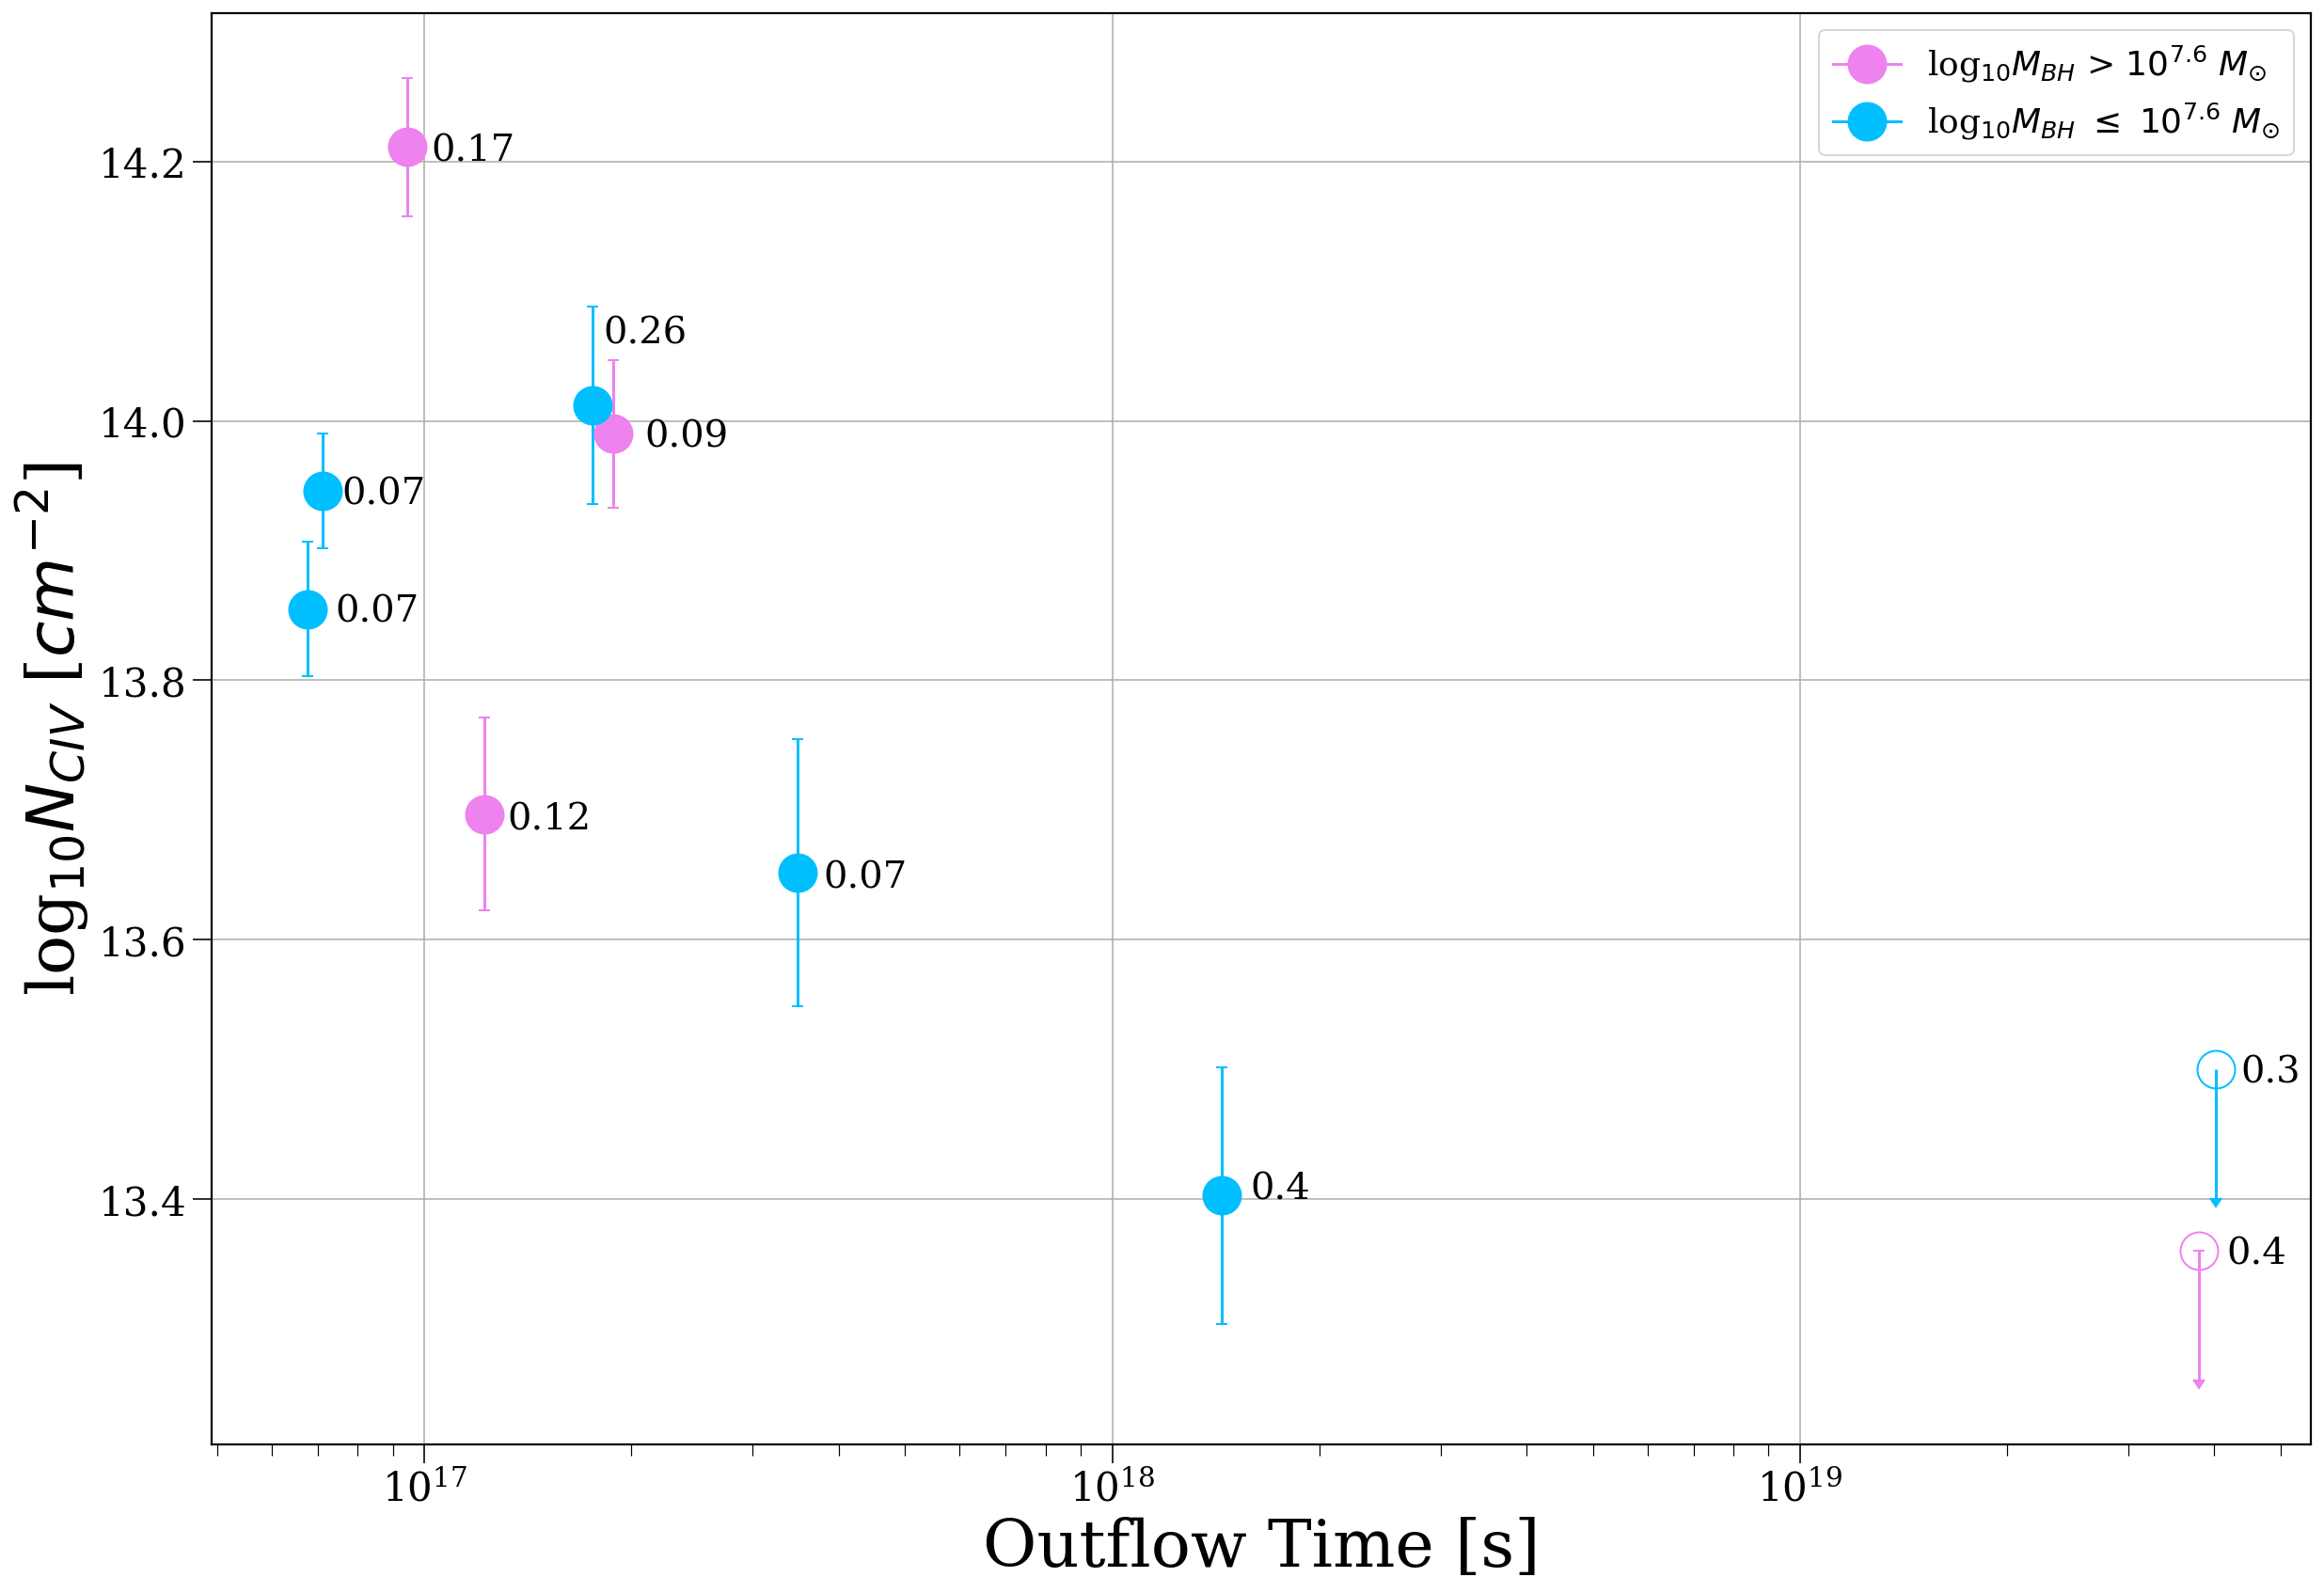

In [33]:
#PRELIMINARY NCIV vs velocity (waiting to hear back from Terrazas
#SFR from Terrazas et al. 2017: https://iopscience.iop.org/article/10.3847/1538-4357/aa7d07/pdf

plt.figure(1)

########### Plotting COS-Holes Data

#J1159
plt.errorbar(b_all[1]/np.absolute(vel_J1159[0]), civ_df_J1159['N'][0], yerr=civ_df_J1159['sigN'][0], capsize = 3, c = 'violet', 
             marker=".", markersize=40)
plt.annotate(f"{np.round(rr[1],2)}", (10**17.12, 13.685), fontsize=20)

#J1249
plt.errorbar(b_all[3]/np.abs(vel_J1249[2]), civ_df_J1249['N'][2], yerr= civ_df_J1249['sigN'][2],
             capsize = 3, c = 'deepskyblue', marker=".", markersize=40)
plt.annotate(f"{np.round(rr[3],2)}", (10**16.87, 13.845), fontsize=20)
plt.errorbar(b_all[3]/np.abs(vel_J1249[4]), civ_df_J1249['N'][4], yerr= civ_df_J1249['sigN'][4],
             capsize = 3, c = 'deepskyblue', marker=".", markersize=40)
plt.annotate(f"{np.round(rr[3],2)}", (10**17.58, 13.64), fontsize=20)
plt.errorbar(b_all[3]/np.abs(vel_J1249[6]), civ_df_J1249['N'][6], yerr= civ_df_J1249['sigN'][6],
             capsize = 3, c = 'deepskyblue', marker=".", markersize=40)
plt.annotate(f"{np.round(rr[3],2)}", (10**16.88, 13.936), fontsize=20)

#J1051
plt.errorbar(b_all[4]/np.abs(vel_J1051[6]), civ_df_J1051['N'][6], yerr= civ_df_J1051['sigN'][6], capsize = 3, c = 'violet', 
             label = 'log$_{10}M_{BH}$ > $10^{7.6}$ $M_{\odot}$', marker=".", markersize=40)
plt.annotate(f"{np.round(rr[4],2)}", (10**17.32, 13.98), fontsize=20)

#J1123
plt.errorbar(b_all[5]/np.abs(vel_J1123[2]), civ_df_J1123['N'][2], yerr=civ_df_J1123['sigN'][2], capsize = 3, 
             c = 'deepskyblue', label = 'log$_{10}M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$', marker=".", markersize=40)
plt.annotate(f"{np.round(rr[5],2)}", (10**17.26, 14.06), fontsize=20)

#J0246
plt.errorbar(b_all[6]/np.abs(vel_J0246[2]), civ_df_J0246['N'][2], yerr=civ_df_J0246['sigN'][2], capsize = 3, c = 'violet',
             marker=".", markersize=40)
plt.annotate(f"{np.round(rr[6],2)}", (10**17.01, 14.2), fontsize=20)

##################################################################
##### Upper Limits

#J1101 - NGC 3489 (0) (DETECTION UPPER LIMIT => not really for now )
plt.errorbar(b_all[0]/np.abs(vel_J1101[4]), civ_df_J1101['N'][4], yerr=civ_df_J1101['sigN'][4], 
             c = 'deepskyblue', marker=".", capsize = 3, markersize=40)
plt.annotate(f"{np.round(rr[0],2)}", (10**18.2, 13.4), fontsize=20)

#Can't divide by zero so like what do I do for these? 

#J1222 - NGC 4248 (2)
plt.errorbar (b_all[2]/0.1, np.log10(10**13.5), yerr=civ_df_J1101['sigN'][4],uplims=True, c = 'deepskyblue', 
              marker=".",mfc='none',markersize=40)
plt.annotate(f"{np.round(rr[2],1)}", (10**19.64, 13.49), fontsize=20)

#J1235 - NGC 4564 (7)
plt.errorbar (b_all[7]/0.1, np.log10(10**13.36), yerr=civ_df_J1101['sigN'][4], uplims=True, c = 'violet', 
              marker=".",mfc='none', capsize = 3, markersize=40)
plt.annotate(f"{np.round(rr[7],2)}", (10**19.62, 13.35), fontsize=20)

plt.xlabel('Outflow Time [s]')
plt.ylabel('log$_{10}N_{CIV}$ [$cm^{-2}$]')
plt.legend(loc=1)
plt.xscale("log") 
plt.grid(True)
plt.show()

In [34]:
b = 10**18 * (u.s)
b

<Quantity 1.e+18 s>

In [35]:
b.to(u.Myr)

<Quantity 31688.08781403 Myr>

### Playing around with the EAGLE Data

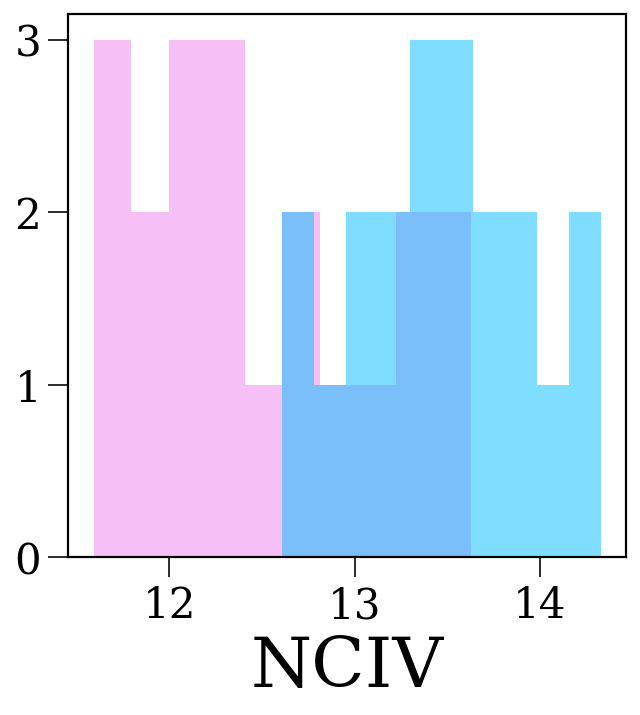

In [36]:
plt.figure(figsize=(5,5))
plt.hist(med_benHbh, color='violet', alpha = 0.5)
plt.hist(med_benLbh, color='deepskyblue', alpha = 0.5)
plt.xlabel('NCIV')
plt.show()

In [37]:
std_ben_high = np.std(med_benHbh)
std_ben_low = np.std(med_benLbh)

print('STD for High EAGLE Sample:', std_ben_high)
print('STD for Low EAGLE Sample:', std_ben_low)

STD for High EAGLE Sample: 0.6119852939409576
STD for Low EAGLE Sample: 0.47201059310146865


In [44]:
statistics.pstdev(med_benHbh)

0.6119852939409576

In [42]:
import statistics

statistics.pvariance(med_benHbh)

0.3745260000000002

In [43]:
statistics.pvariance(med_benLbh)

0.22279400000000021

In [102]:
#Going to try to make a df that has the information that I want from COS and EAGLE 

cos_eagle_HIGH = {'galaxy': [gal_param_df['galaxy'][5], gal_param_df['galaxy'][7], gal_param_df['galaxy'][0], gal_param_df['galaxy'][8]],
                 'QSOname': ['1051', '0246', '1101', '1235'], 
                 'Rproj': [gal_param_df['Rproj'][5], gal_param_df['Rproj'][7], gal_param_df['Rproj'][0], gal_param_df['Rproj'][8]], 
                 'b': [BenHbh_df['#b'][2], BenHbh_df['#b'][3], BenHbh_df['#b'][7], BenHbh_df['#b'][8]], 
                 'NCIV': [civ_df_J1051['N'][6], civ_df_J0246['N'][2], civ_df_J1101['N'][4], np.log10(10**13.36)],
                  'NCIV_err': [civ_df_J1051['sigN'][6], civ_df_J0246['sigN'][2], civ_df_J1101['sigN'][4], -0.001],
                 'medianCIV': [BenHbh_df['median'][2], BenHbh_df['median'][3], BenHbh_df['median'][7], BenHbh_df['median'][8]]}
CE_HIGH = pd.DataFrame(data=cos_eagle_HIGH)

cos_eagle_LOW = {'galaxy': [gal_param_df['galaxy'][4], gal_param_df['galaxy'][1], gal_param_df['galaxy'][6], gal_param_df['galaxy'][3]],
                 'QSOname': ['1249', '1159', '1123', '1122'], 
                 'Rproj': [gal_param_df['Rproj'][4], gal_param_df['Rproj'][1], gal_param_df['Rproj'][6], gal_param_df['Rproj'][3]], 
                 'b': [BenLbh_df['#b'][1], BenLbh_df['#b'][2], BenLbh_df['#b'][7], BenLbh_df['#b'][8]], 
                 'NCIV': [np.log10(10**civ_df_J1249['N'][2] + 10**civ_df_J1249['N'][4] + 10**civ_df_J1249['N'][6]), 
                          civ_df_J1159['N'][0], civ_df_J1123['N'][2], np.log10(10**13.5)],
                 'NCIV_err': [np.sqrt(civ_df_J1249['sigN'][2]**2 + civ_df_J1249['sigN'][4]**2 + civ_df_J1249['sigN'][6]**2), 
                          civ_df_J1159['sigN'][0], civ_df_J1123['sigN'][2], -0.001],
                 'medianCIV': [BenLbh_df['median'][1], BenLbh_df['median'][2], BenLbh_df['median'][7],BenLbh_df['median'][8]]}
CE_LOW = pd.DataFrame(data=cos_eagle_LOW)

In [86]:
CE_HIGH

,galaxy,QSOname,Rproj,b,NCIV,NCIV_err,medianCIV
0,NGC3414,1051,40.499140,37.5,13.990,0.057,13.41
1,NGC1097,0246,55.657239,52.5,14.211,0.053,13.24
2,NGC3489,1101,110.019140,112.5,13.403,0.099,12.62
3,NGC4564,1235,123.078500,127.5,13.360,-0.001,12.52


In [95]:
CE_HIGH['Rproj'][3:]

3    123.0785
Name: Rproj, dtype: float64

In [103]:
CE_LOW

,galaxy,QSOname,Rproj,b,NCIV,NCIV_err,medianCIV
0,NGC4736,1249,25.520224,22.5,14.311323,0.123487,14.21
1,NGC4026,1159,37.385240,37.5,13.697000,0.074000,14.06
2,NGC3627,1123,119.976000,112.5,14.012000,0.076000,13.61
3,NGC4258,1122,130.305660,127.5,13.500000,-0.001000,13.58


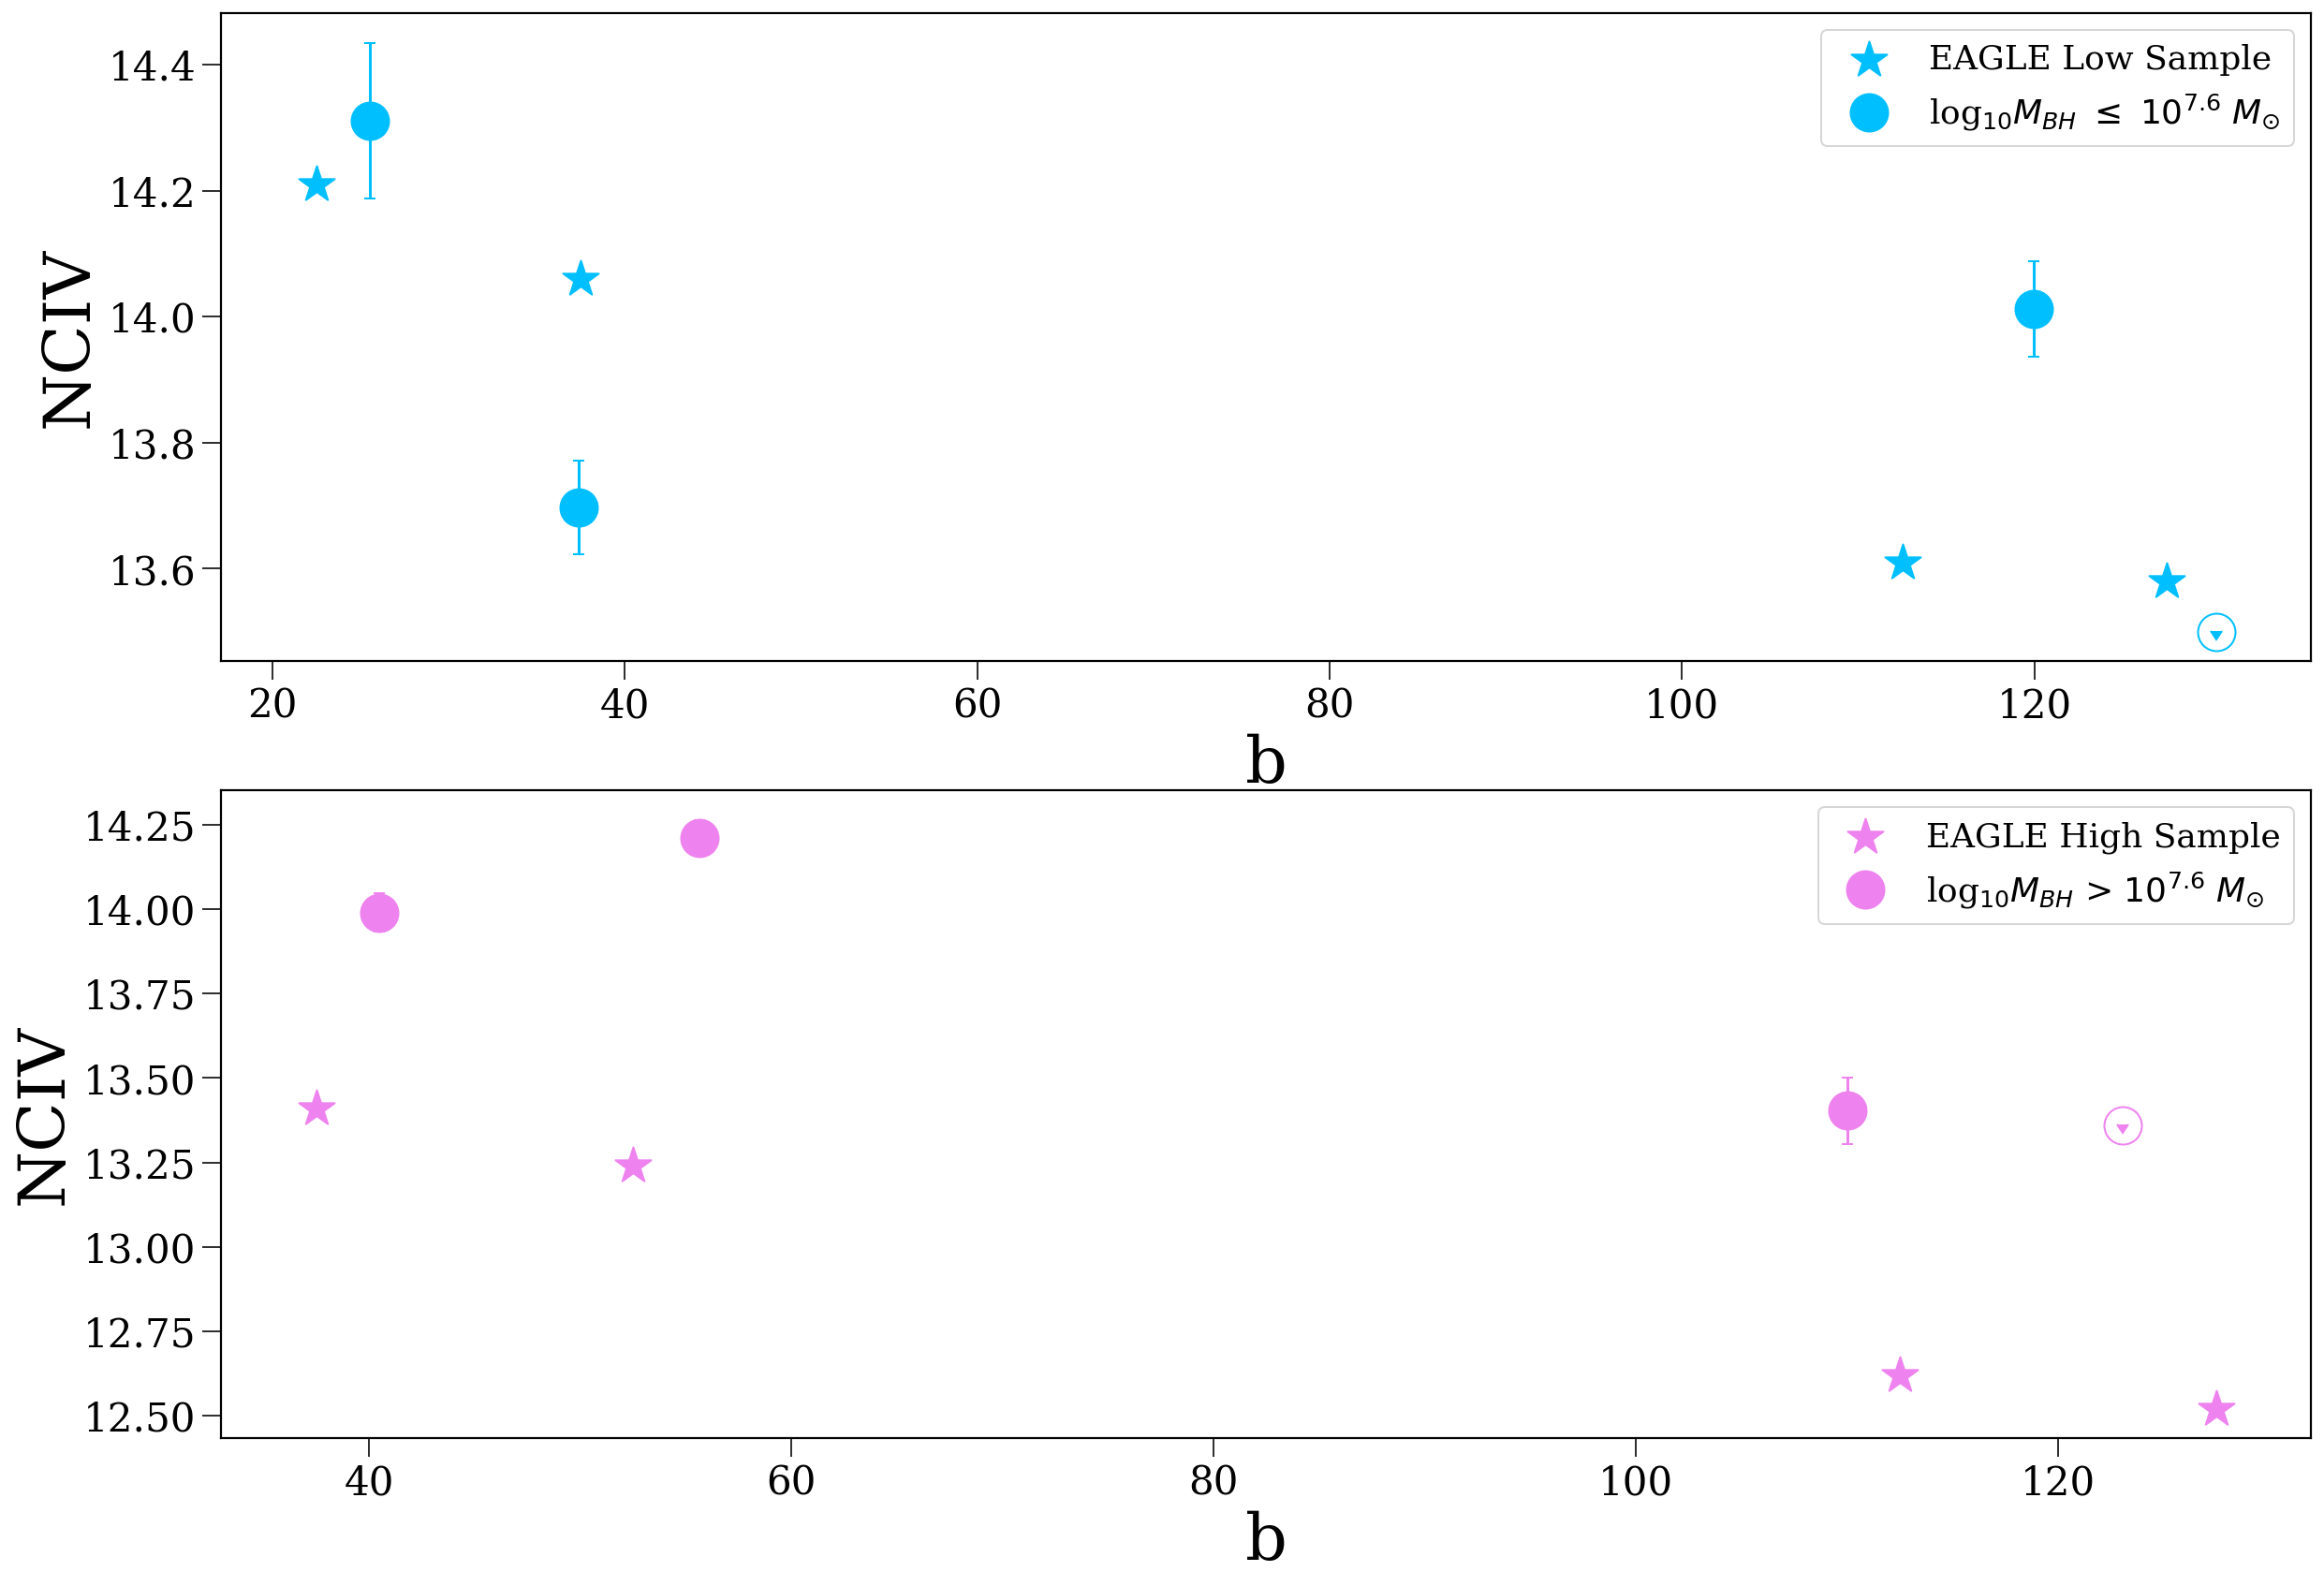

In [109]:
fig, ax = plt.subplots(2,1)
ax[0].errorbar(CE_LOW['Rproj'][:3], CE_LOW['NCIV'][:3], yerr = CE_LOW['NCIV_err'][:3], c='deepskyblue', 
             marker="o", markersize=20, capsize = 3, ls='none', label = 'log$_{10}M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$')
ax[0].errorbar(CE_LOW['Rproj'][3:], CE_LOW['NCIV'][3:], yerr = CE_LOW['NCIV_err'][3:], c='deepskyblue', 
             marker="o", markersize=20, capsize = 3, mfc='none', uplims=True)
ax[0].scatter(CE_LOW['b'], CE_LOW['medianCIV'], color='deepskyblue', marker="*", s=400, label = 'EAGLE Low Sample')
ax[0].set_ylabel('NCIV')
ax[0].set_xlabel('b')
ax[0].legend()

ax[1].errorbar(CE_HIGH['Rproj'][:3], CE_HIGH['NCIV'][:3], yerr = CE_HIGH['NCIV_err'][:3], c='violet', 
             marker="o", markersize=20, capsize = 3, ls='none', label ='log$_{10}M_{BH}$ > $10^{7.6}$ $M_{\odot}$')
ax[1].errorbar(CE_HIGH['Rproj'][3:], CE_HIGH['NCIV'][3:], yerr = CE_HIGH['NCIV_err'][3:], c='violet', 
             marker="o", markersize=20, capsize = 3, mfc='none', uplims=True)
ax[1].scatter(CE_HIGH['b'], CE_HIGH['medianCIV'], color='violet', marker="*", s=400, label = 'EAGLE High Sample')
ax[1].set_ylabel('NCIV')
ax[1].set_xlabel('b')
ax[1].legend()
plt.show()

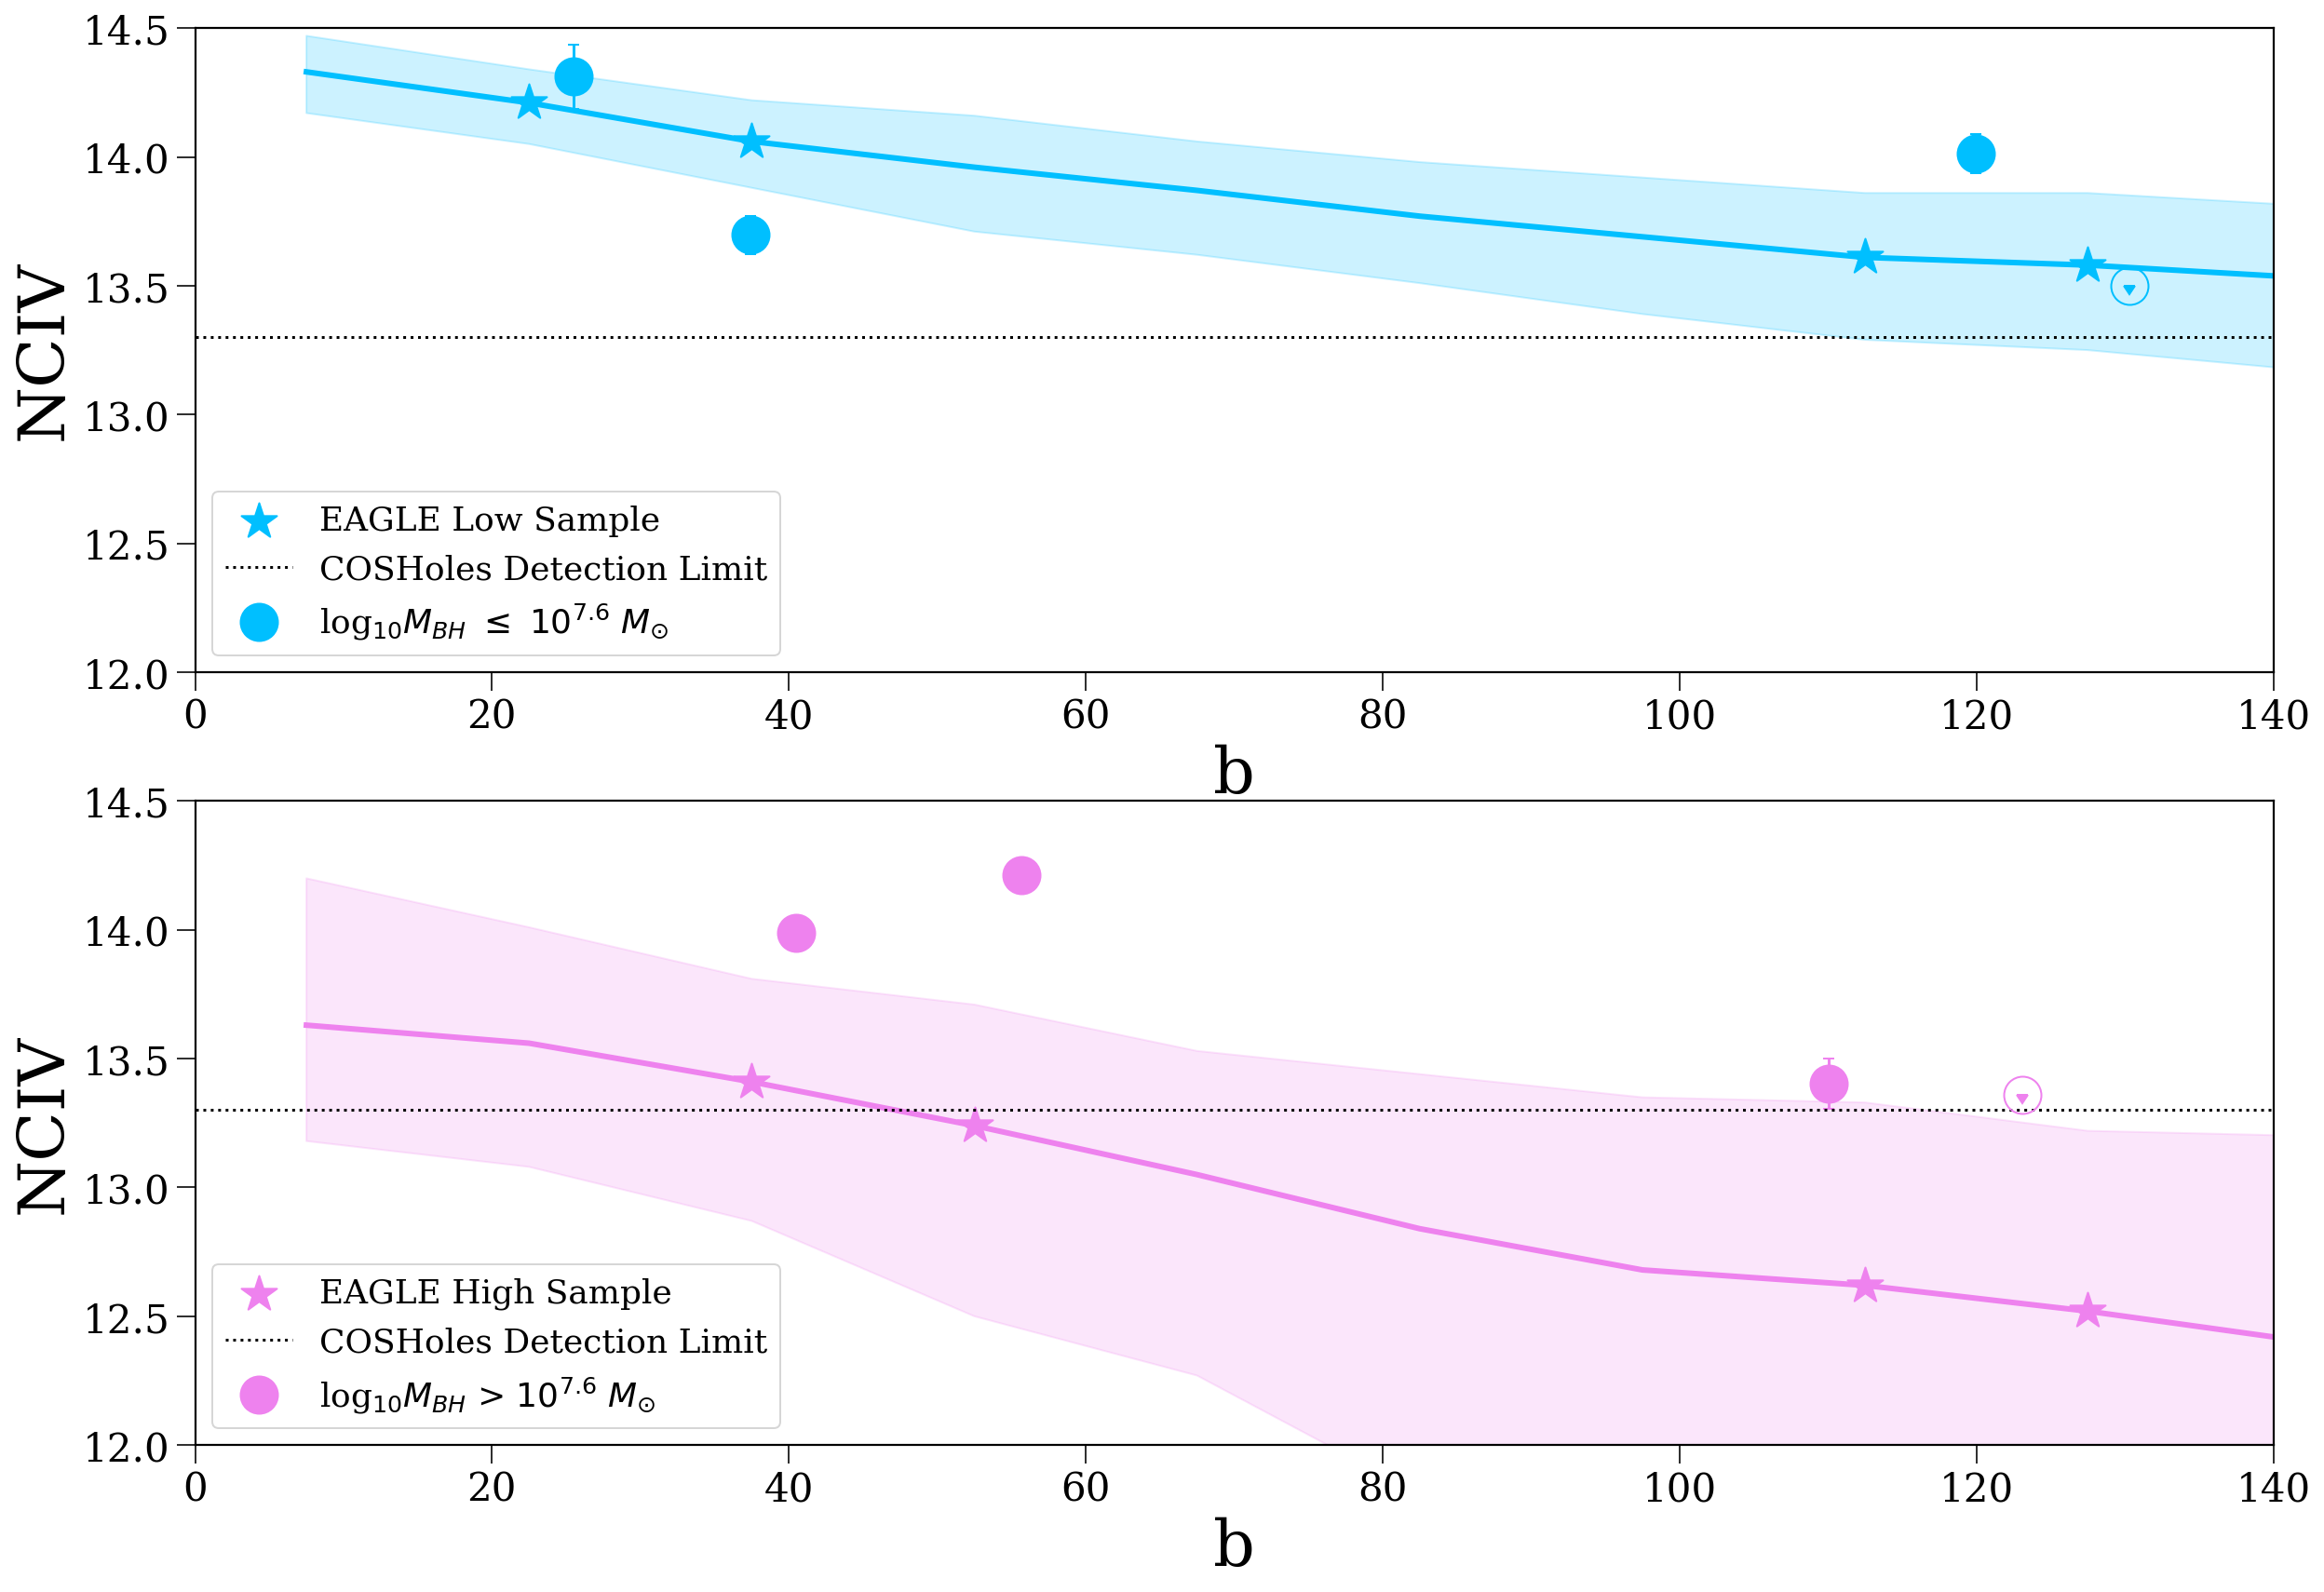

In [114]:
fig, ax = plt.subplots(2,1)
ax[0].fill_between(b_benLbh, ben_25Lbh, ben_75Lbh, alpha = 0.2, color = 'deepskyblue')
ax[0].plot(b_benLbh, med_benLbh, color = 'deepskyblue', lw = 3)
ax[0].errorbar(CE_LOW['Rproj'][:3], CE_LOW['NCIV'][:3], yerr = CE_LOW['NCIV_err'][:3], c='deepskyblue', 
             marker="o", markersize=20, capsize = 3, ls='none', label = 'log$_{10}M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$')
ax[0].errorbar(CE_LOW['Rproj'][3:], CE_LOW['NCIV'][3:], yerr = CE_LOW['NCIV_err'][3:], c='deepskyblue', 
             marker="o", markersize=20, capsize = 3, mfc='none', uplims=True)
ax[0].scatter(CE_LOW['b'], CE_LOW['medianCIV'], color='deepskyblue', marker="*", s=400, label = 'EAGLE Low Sample')
ax[0].axhline(13.3, c='k', ls=':', label='COSHoles Detection Limit')
ax[0].set_ylabel('NCIV')
ax[0].set_xlabel('b')
ax[0].set_xlim(0,140)
ax[0].set_ylim(12,14.5)
ax[0].legend()

ax[1].fill_between(b_benHbh, ben_25Hbh, ben_75Hbh, alpha = 0.2, color = 'violet')
ax[1].plot(b_benHbh, med_benHbh, color = 'violet', lw = 3)
ax[1].errorbar(CE_HIGH['Rproj'][:3], CE_HIGH['NCIV'][:3], yerr = CE_HIGH['NCIV_err'][:3], c='violet', 
             marker="o", markersize=20, capsize = 3, ls='none', label ='log$_{10}M_{BH}$ > $10^{7.6}$ $M_{\odot}$')
ax[1].errorbar(CE_HIGH['Rproj'][3:], CE_HIGH['NCIV'][3:], yerr = CE_HIGH['NCIV_err'][3:], c='violet', 
             marker="o", markersize=20, capsize = 3, mfc='none', uplims=True)
ax[1].scatter(CE_HIGH['b'], CE_HIGH['medianCIV'], color='violet', marker="*", s=400, label = 'EAGLE High Sample')
ax[1].axhline(13.3, c='k', ls=':', label='COSHoles Detection Limit')
ax[1].set_ylabel('NCIV')
ax[1].set_xlabel('b')
ax[1].set_xlim(0,140)
ax[1].set_ylim(12,14.5)
ax[1].legend(loc=3)
plt.show()